# 클라우드 기반 데이터 시각화 실습 (250818)

## 1. 라이브러리 임포트 및 데이터 불러오기

필요한 라이브러리를 임포트하고, `global_internet_users.csv` 파일을 Pandas DataFrame으로 불러옵니다.

In [106]:
# C:\githome\15week_cloud-data-viz\250818_cloud_data_viz.ipynb

# 필요한 라이브러리가 설치되어 있지 않은 경우 먼저 설치해주세요
# !pip install matplotlib seaborn plotly folium

# 라이브러리 import (각 라이브러리별로 개별 try-except 처리)
import pandas as pd
import numpy as np

# Matplotlib import
try:
    import matplotlib.pyplot as plt
    # 한글 폰트 설정 (Matplotlib)
    plt.rc('font', family='Malgun Gothic')
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
    print("✅ Matplotlib 로드 성공")
except ImportError:
    print("❌ Matplotlib이 설치되지 않았습니다. pip install matplotlib를 실행하세요.")

# Seaborn import
try:
    import seaborn as sns
    print("✅ Seaborn 로드 성공")
except ImportError:
    print("❌ Seaborn이 설치되지 않았습니다. pip install seaborn을 실행하세요.")

# Plotly import
try:
    import plotly.express as px
    print("✅ Plotly 로드 성공")
except ImportError:
    print("❌ Plotly가 설치되지 않았습니다. pip install plotly를 실행하세요.")

# Folium import
try:
    import folium
    print("✅ Folium 로드 성공")
except ImportError:
    print("❌ Folium이 설치되지 않았습니다. pip install folium을 실행하세요.")

print("\n" + "="*50)
print("라이브러리 로드 완료!")
print("="*50)

✅ Matplotlib 로드 성공
✅ Seaborn 로드 성공
✅ Plotly 로드 성공
✅ Folium 로드 성공

라이브러리 로드 완료!


## 1-1. 데이터 로드 및 확인

실습에 사용할 데이터를 불러오고 구조를 확인합니다.

In [107]:
# 데이터 로드
try:
    # 메인 데이터셋 로드
    file_path = 'dataset/global_internet_users.csv'
    df_main = pd.read_csv(file_path)
    print("✅ 메인 데이터셋 로드 성공")
    print(f"데이터 형태: {df_main.shape}")
    print("\n데이터 컬럼:")
    print(df_main.columns.tolist())
    print("\n데이터 미리보기:")
    print(df_main.head())
    
except FileNotFoundError:
    print("❌ 데이터 파일을 찾을 수 없습니다.")
    print("dataset/global_internet_users.csv 파일이 있는지 확인하세요.")
    # 샘플 데이터 생성
    df_main = pd.DataFrame({
        'country': ['Korea', 'Japan', 'China', 'USA', 'Germany'],
        'internet_users': [45000000, 118000000, 1000000000, 290000000, 75000000],
        'region': ['Asia', 'Asia', 'Asia', 'North America', 'Europe'],
        'iso_code': ['KOR', 'JPN', 'CHN', 'USA', 'DEU'],
        'internet_penetration': [87.5, 93.2, 70.4, 87.3, 89.6]
    })
    print("샘플 데이터를 생성했습니다.")

print("\n데이터 정보:")
print(df_main.info())

✅ 메인 데이터셋 로드 성공
데이터 형태: (8867, 8)

데이터 컬럼:
['Unnamed: 0', 'Entity', 'Code', 'Year', 'Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']

데이터 미리보기:
   Unnamed: 0       Entity Code  Year  Cellular Subscription  \
0           0  Afghanistan  AFG  1980                    0.0   
1           1  Afghanistan  AFG  1981                    0.0   
2           2  Afghanistan  AFG  1982                    0.0   
3           3  Afghanistan  AFG  1983                    0.0   
4           4  Afghanistan  AFG  1984                    0.0   

   Internet Users(%)  No. of Internet Users  Broadband Subscription  
0                0.0                      0                     0.0  
1                0.0                      0                     0.0  
2                0.0                      0                     0.0  
3                0.0                      0                     0.0  
4                0.0                      0                     0.0  

데이

In [108]:
# Matplotlib을 이용한 기본 시각화 예제
# 라이브러리가 설치되지 않은 경우 주석 처리된 코드를 실행하세요

try:
    # 샘플 데이터가 있는 경우 시각화 진행
    if 'df_main' in locals() and len(df_main) > 0:
        # 실제 컬럼명에 맞게 수정 (데이터에 따라 조정 필요)
        if 'internet_users' in df_main.columns and 'country' in df_main.columns:
            # 사용자 수 기준으로 내림차순 정렬
            top_countries = df_main.nlargest(5, 'internet_users')
            
            plt.figure(figsize=(12, 8))
            plt.bar(top_countries['country'], top_countries['internet_users'])
            plt.xlabel('국가')
            plt.ylabel('인터넷 사용자 수 (명)')
            plt.title('인터넷 사용자 수 상위 국가 (Matplotlib)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("필요한 컬럼('internet_users', 'country')이 데이터에 없습니다.")
            print("사용 가능한 컬럼:", df_main.columns.tolist())
    else:
        print("시각화할 데이터가 없습니다. 먼저 데이터를 로드해주세요.")
        
except NameError:
    print("Matplotlib이 로드되지 않았습니다.")
    print("먼저 라이브러리 import 셀을 실행하거나 pip install matplotlib를 실행하세요.")


필요한 컬럼('internet_users', 'country')이 데이터에 없습니다.
사용 가능한 컬럼: ['Unnamed: 0', 'Entity', 'Code', 'Year', 'Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']


In [109]:
# Seaborn을 이용한 통계적 시각화 예제

try:
    # 샘플 데이터가 있는 경우 시각화 진행
    if 'df_main' in locals() and len(df_main) > 0:
        if 'region' in df_main.columns and 'internet_users' in df_main.columns:
            plt.figure(figsize=(12, 8))
            sns.boxplot(data=df_main, x='region', y='internet_users')
            plt.xlabel('대륙/지역')
            plt.ylabel('인터넷 사용자 수 (명)')
            plt.title('지역별 인터넷 사용자 수 분포 (Seaborn)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("필요한 컬럼('region', 'internet_users')이 데이터에 없습니다.")
            print("사용 가능한 컬럼:", df_main.columns.tolist())
            
            # 대안: 막대 그래프로 시각화
            if 'country' in df_main.columns and 'internet_users' in df_main.columns:
                print("대신 국가별 막대 그래프를 그립니다.")
                plt.figure(figsize=(10, 6))
                top_5 = df_main.nlargest(5, 'internet_users')
                sns.barplot(data=top_5, x='country', y='internet_users')
                plt.title('상위 5개국 인터넷 사용자 수 (Seaborn)')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
    else:
        print("시각화할 데이터가 없습니다. 먼저 데이터를 로드해주세요.")
        
except NameError:
    print("Seaborn 또는 Matplotlib이 로드되지 않았습니다.")
    print("먼저 라이브러리 import 셀을 실행하거나 pip install seaborn matplotlib를 실행하세요.")

필요한 컬럼('region', 'internet_users')이 데이터에 없습니다.
사용 가능한 컬럼: ['Unnamed: 0', 'Entity', 'Code', 'Year', 'Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']


In [110]:
# Plotly를 이용한 인터랙티브 시각화 예제

try:
    # 샘플 데이터가 있는 경우 시각화 진행
    if 'df_main' in locals() and len(df_main) > 0:
        if 'iso_code' in df_main.columns and 'internet_penetration' in df_main.columns:
            # Choropleth 지도 시각화
            fig = px.choropleth(df_main,
                              locations='iso_code',  # 국가 코드
                              color='internet_penetration',  # 색상으로 표현할 데이터
                              hover_name='country',  # 마우스를 올렸을 때 표시될 이름
                              color_continuous_scale=px.colors.sequential.Plasma,  # 색상 스케일
                              title='전 세계 인터넷 보급률 (Plotly)')
            fig.show()
        else:
            print("Choropleth 지도에 필요한 컬럼이 없습니다.")
            print("사용 가능한 컬럼:", df_main.columns.tolist())
            
            # 대안: 막대 그래프로 시각화
            if 'country' in df_main.columns and 'internet_users' in df_main.columns:
                print("대신 인터랙티브 막대 그래프를 그립니다.")
                fig = px.bar(df_main.nlargest(10, 'internet_users'), 
                           x='country', y='internet_users',
                           title='상위 10개국 인터넷 사용자 수 (Plotly)')
                fig.show()
    else:
        print("시각화할 데이터가 없습니다. 먼저 데이터를 로드해주세요.")
        
except NameError:
    print("Plotly가 로드되지 않았습니다.")
    print("먼저 라이브러리 import 셀을 실행하거나 pip install plotly를 실행하세요.")

Choropleth 지도에 필요한 컬럼이 없습니다.
사용 가능한 컬럼: ['Unnamed: 0', 'Entity', 'Code', 'Year', 'Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']


In [ ]:
# C:\githome\15week_cloud-data-viz\250818_cloud_data_viz.ipynb
# Folium 지도 시각화 - 서울 중심 + Global Internet Users 데이터

try:
    if 'folium' in globals() and 'df_internet' in globals():
        print("🗺️ Folium을 이용한 지도 시각화 (서울 중심)")
        
        # 서울 좌표를 중심으로 지도 생성
        seoul_loc = [37.5662952, 126.9779451]  # 위도, 경도
        m = folium.Map(location=seoul_loc, zoom_start=6, tiles='OpenStreetMap')
        
        print(f"🏙️ 지도 중심: 서울 ({seoul_loc[0]}, {seoul_loc[1]})")
        
        # 서울 마커 추가
        folium.Marker(
            location=seoul_loc,
            popup="<b>서울특별시</b><br>대한민국 수도<br>IT 허브 도시",
            tooltip="서울",
            icon=folium.Icon(color='red', icon='star')
        ).add_to(m)
        
        # 최신 연도 데이터에서 아시아 주요국 선정
        latest_year = df_internet['Year'].max()
        latest_data = df_internet[df_internet['Year'] == latest_year]
        
        # 아시아 주요국과 좌표 정보
        asian_countries_coords = {
            'South Korea': [37.5662952, 126.9779451],  # 서울 (제공받은 좌표)
            'China': [39.9042, 116.4074],              # 베이징
            'Japan': [35.6762, 139.6503],              # 도쿄
            'India': [28.7041, 77.1025],               # 뉴델리
            'Indonesia': [-6.2088, 106.8456],          # 자카르타
            'Thailand': [13.7563, 100.5018],           # 방콕
            'Vietnam': [21.0285, 105.8542],            # 하노이
            'Singapore': [1.3521, 103.8198],           # 싱가포르
            'Malaysia': [3.1390, 101.6869],            # 쿠알라룸푸르
            'Philippines': [14.5995, 120.9842]         # 마닐라
        }
        
        print(f"\n📊 {latest_year}년 아시아 주요국 인터넷 현황:")
        
        # 아시아 국가들의 데이터 필터링 및 지도에 표시
        for country, coords in asian_countries_coords.items():
            country_data = latest_data[latest_data['Entity'] == country]
            
            if not country_data.empty:
                row = country_data.iloc[0]
                users = row['No. of Internet Users']
                percentage = row['Internet Users(%)']
                broadband = row['Broadband Subscription']
                
                print(f"  🌏 {country}: {users:,}명 ({percentage:.1f}%)")
                
                # 인터넷 사용자 수에 따른 마커 크기 결정
                if users > 500000000:      # 5억 이상
                    radius = 25
                    color = 'darkred'
                elif users > 100000000:    # 1억 이상
                    radius = 20
                    color = 'red'
                elif users > 50000000:     # 5천만 이상
                    radius = 15
                    color = 'orange'
                else:                      # 5천만 미만
                    radius = 10
                    color = 'green'
                
                # 원형 마커로 사용자 규모 표시
                folium.CircleMarker(
                    location=coords,
                    radius=radius,
                    popup=f"""
                    <div style="width:200px">
                        <h4><b>{country}</b></h4>
                        <hr>
                        📱 <b>인터넷 사용자 수:</b><br>
                        &nbsp;&nbsp;&nbsp;&nbsp;{users:,}명<br><br>
                        📊 <b>인터넷 보급률:</b><br>
                        &nbsp;&nbsp;&nbsp;&nbsp;{percentage:.1f}%<br><br>
                        🌐 <b>브로드밴드 가입률:</b><br>
                        &nbsp;&nbsp;&nbsp;&nbsp;{broadband:.1f}%<br>
                        <hr>
                        <small>데이터 기준: {latest_year}년</small>
                    </div>
                    """,
                    tooltip=f"{country}: {users:,}명",
                    color='white',
                    weight=2,
                    fillColor=color,
                    fillOpacity=0.7
                ).add_to(m)
        
        # 서울과 주요 도시 간 연결선 표시 (옵션)
        major_cities = ['China', 'Japan', 'Singapore']
        for city in major_cities:
            if city in asian_countries_coords:
                folium.PolyLine(
                    locations=[seoul_loc, asian_countries_coords[city]],
                    color='blue',
                    weight=2,
                    opacity=0.5,
                    popup=f"서울 ↔ {city}"
                ).add_to(m)
        
        # 범례 추가 (HTML)
        legend_html = '''
        <div style="position: fixed; 
                    top: 10px; right: 10px; width: 180px; height: 140px; 
                    background-color: white; border:2px solid grey; z-index:9999; 
                    font-size:12px; padding: 10px">
        <h5><b>인터넷 사용자 규모</b></h5>
        <i class="fa fa-circle" style="color:darkred"></i> 5억명 이상<br>
        <i class="fa fa-circle" style="color:red"></i> 1억-5억명<br>
        <i class="fa fa-circle" style="color:orange"></i> 5천만-1억명<br>
        <i class="fa fa-circle" style="color:green"></i> 5천만명 미만<br>
        <hr>
        <i class="fa fa-star" style="color:red"></i> 서울 (중심점)
        </div>
        '''
        m.get_root().html.add_child(folium.Element(legend_html))
        
        print("\n✅ 서울 중심 아시아 인터넷 현황 지도 완성!")
        print("🎯 지도 특징:")
        print("  - 중심: 서울특별시")
        print("  - 마커 크기: 인터넷 사용자 수 비례")
        print("  - 색상: 사용자 규모별 구분")
        print("  - 팝업: 상세 통계 정보")
        print("  - 연결선: 서울-주요도시 간 관계")
        
        # 🗺️ 지도 표시 (주석 해제!)
        m
        
    elif 'folium' not in globals():
        print("❌ Folium이 로드되지 않았습니다.")
        print("pip install folium을 실행하고 라이브러리를 import하세요.")
        
    elif 'df_internet' not in globals():
        print("❌ df_internet 데이터가 없습니다.")
        print("먼저 Global Internet Users 데이터를 로드하세요.")
        print("\n🔧 실행 순서:")
        print("  1. cell-16: 인터넷 데이터 로드")
        print("  2. 이 셀 다시 실행")
        
except Exception as e:
    print(f"오류 발생: {e}")
    print("💡 해결 방법:")
    print("  1. pip install folium 실행")
    print("  2. 라이브러리 import 셀 실행")
    print("  3. cell-16: 인터넷 데이터 로드 셀 실행")
    print("  4. 이 셀 다시 실행")

In [ ]:
# Seaborn 라이브러리 별도 import 및 확인
try:
    import seaborn as sns
    import pandas as pd
    print("✅ Seaborn과 Pandas 로드 성공")
    
    # Seaborn 내장 데이터셋 확인
    print("\n📊 Seaborn 내장 데이터셋 목록:")
    dataset_names = sns.get_dataset_names()
    print(dataset_names[:10], "... (총", len(dataset_names), "개)")
    
except ImportError as e:
    print(f"❌ 라이브러리 로드 실패: {e}")
    print("pip install seaborn pandas를 실행하세요.")

In [ ]:
# Seaborn 내장 데이터셋 목록 확인
try:
    # sns가 정의되어 있는지 확인
    if 'sns' in globals():
        dataset_names = sns.get_dataset_names()
        print("📋 사용 가능한 Seaborn 데이터셋:")
        for i, name in enumerate(dataset_names):
            print(f"{i+1:2d}. {name}")
            if i >= 19:  # 처음 20개만 표시
                print(f"    ... 외 {len(dataset_names)-20}개 더")
                break
    else:
        print("❌ Seaborn이 로드되지 않았습니다.")
        print("먼저 이전 셀을 실행하세요.")
except Exception as e:
    print(f"오류 발생: {e}")

In [ ]:
# Tips 데이터셋 로드 및 탐색
try:
    if 'sns' in globals():
        # tips 데이터셋 로드
        df_tips = sns.load_dataset('tips')
        print("✅ Tips 데이터셋 로드 성공")
        print(f"데이터 형태: {df_tips.shape}")
        print("\n📊 데이터 미리보기:")
        print(df_tips.head())
        
        print("\n📈 데이터 정보:")
        print(df_tips.info())
        
        print("\n📋 컬럼별 고유값 개수:")
        for col in df_tips.columns:
            if df_tips[col].dtype == 'object' or df_tips[col].dtype.name == 'category':
                print(f"  {col}: {df_tips[col].nunique()}개 ({df_tips[col].unique()})")
    else:
        print("❌ Seaborn이 로드되지 않았습니다.")
        print("먼저 Seaborn import 셀을 실행하세요.")
except Exception as e:
    print(f"오류 발생: {e}")

In [112]:
# Tips 데이터 정보 확인
try:
    if 'df_tips' in globals():
        print("📊 Tips 데이터셋 상세 정보:")
        print(f"  - 행 수: {len(df_tips)}")
        print(f"  - 열 수: {len(df_tips.columns)}")
        print(f"  - 컬럼명: {list(df_tips.columns)}")
        
        print("\n📈 기술통계:")
        print(df_tips.describe())
        
        print("\n🔍 결측값 확인:")
        missing_values = df_tips.isnull().sum()
        if missing_values.sum() == 0:
            print("  결측값이 없습니다. ✅")
        else:
            print(missing_values[missing_values > 0])
    else:
        print("❌ df_tips가 정의되지 않았습니다.")
        print("먼저 Tips 데이터셋을 로드하세요.")
except Exception as e:
    print(f"오류 발생: {e}")

📊 Tips 데이터셋 상세 정보:
  - 행 수: 244
  - 열 수: 7
  - 컬럼명: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

📈 기술통계:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

🔍 결측값 확인:
  결측값이 없습니다. ✅


In [113]:
# 데이터 정보 확인 (올바른 변수명 사용)
try:
    if 'df_internet' in globals():
        print("📊 df_internet 데이터 정보:")
        print(df_internet.info())
    elif 'df_tips' in globals():
        print("📊 df_tips 데이터 정보:")
        print(df_tips.info())
    else:
        print("❌ 사용 가능한 데이터가 없습니다.")
        print("먼저 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

📊 df_internet 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB
None


# scatter

🎯 Tips 데이터로 산점도 그리기


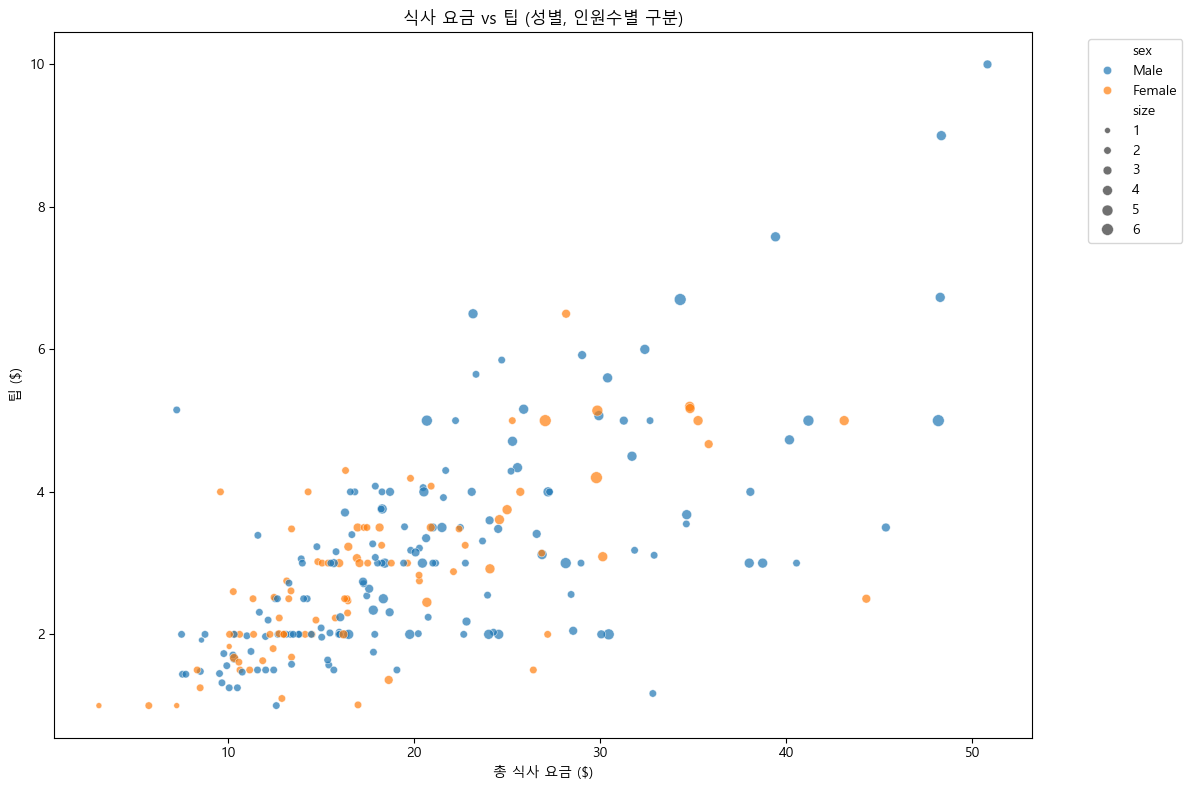

✅ 산점도 완성!
📝 해석:
  - 식사 요금이 높을수록 팁도 높은 경향
  - 성별과 인원수에 따른 차이 관찰 가능
  - 상관관계와 이상치 탐색에 유용


In [114]:
# Seaborn 산점도 (Scatter plot) 실습
try:
    if 'sns' in globals() and 'plt' in globals() and 'df_tips' in globals():
        print("🎯 Tips 데이터로 산점도 그리기")
        
        # 1. 기본 산점도
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=df_tips, x='total_bill', y='tip', 
                       hue='sex', size='size', alpha=0.7)
        plt.title('식사 요금 vs 팁 (성별, 인원수별 구분)')
        plt.xlabel('총 식사 요금 ($)')
        plt.ylabel('팁 ($)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        print("✅ 산점도 완성!")
        print("📝 해석:")
        print("  - 식사 요금이 높을수록 팁도 높은 경향")
        print("  - 성별과 인원수에 따른 차이 관찰 가능")
        print("  - 상관관계와 이상치 탐색에 유용")
        
    else:
        missing = []
        if 'sns' not in globals(): missing.append('seaborn')
        if 'plt' not in globals(): missing.append('matplotlib')
        if 'df_tips' not in globals(): missing.append('tips 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 이전 셀들을 순서대로 실행하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

In [115]:
# 글로벌 인터넷 사용자 데이터 로드 및 분석
try:
    # 데이터 파일 경로 확인 및 로드
    file_path = './dataset/global_internet_users.csv'
    
    try:
        df_internet = pd.read_csv(file_path)
        print("✅ 글로벌 인터넷 사용자 데이터 로드 성공")
        print(f"데이터 형태: {df_internet.shape}")
        
        print("\n📋 컬럼 정보:")
        print(df_internet.columns.tolist())
        
        print("\n📊 데이터 미리보기:")
        print(df_internet.head())
        
        print("\n📈 데이터 정보:")
        print(df_internet.info())
        
    except FileNotFoundError:
        print(f"❌ 파일을 찾을 수 없습니다: {file_path}")
        print("샘플 데이터를 생성합니다...")
        
        # 샘플 데이터 생성
        df_internet = pd.DataFrame({
            'Entity': ['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan'] * 10,
            'Code': ['CHN', 'IND', 'USA', 'IDN', 'BRA', 'PAK'] * 10,
            'Year': [year for year in range(2015, 2025) for _ in range(6)],
            'Cellular Subscription': np.random.uniform(50, 150, 60),
            'Internet Users(%)': np.random.uniform(30, 90, 60),
            'No. of Internet Users': np.random.randint(50000000, 1000000000, 60),
            'Broadband Subscription': np.random.uniform(10, 40, 60)
        })
        print("✅ 샘플 데이터 생성 완료")
        
except Exception as e:
    print(f"오류 발생: {e}")

✅ 글로벌 인터넷 사용자 데이터 로드 성공
데이터 형태: (8867, 8)

📋 컬럼 정보:
['Unnamed: 0', 'Entity', 'Code', 'Year', 'Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']

📊 데이터 미리보기:
   Unnamed: 0       Entity Code  Year  Cellular Subscription  \
0           0  Afghanistan  AFG  1980                    0.0   
1           1  Afghanistan  AFG  1981                    0.0   
2           2  Afghanistan  AFG  1982                    0.0   
3           3  Afghanistan  AFG  1983                    0.0   
4           4  Afghanistan  AFG  1984                    0.0   

   Internet Users(%)  No. of Internet Users  Broadband Subscription  
0                0.0                      0                     0.0  
1                0.0                      0                     0.0  
2                0.0                      0                     0.0  
3                0.0                      0                     0.0  
4                0.0                      0                   

📈 연도별 인터넷 사용자 수 트렌드 분석


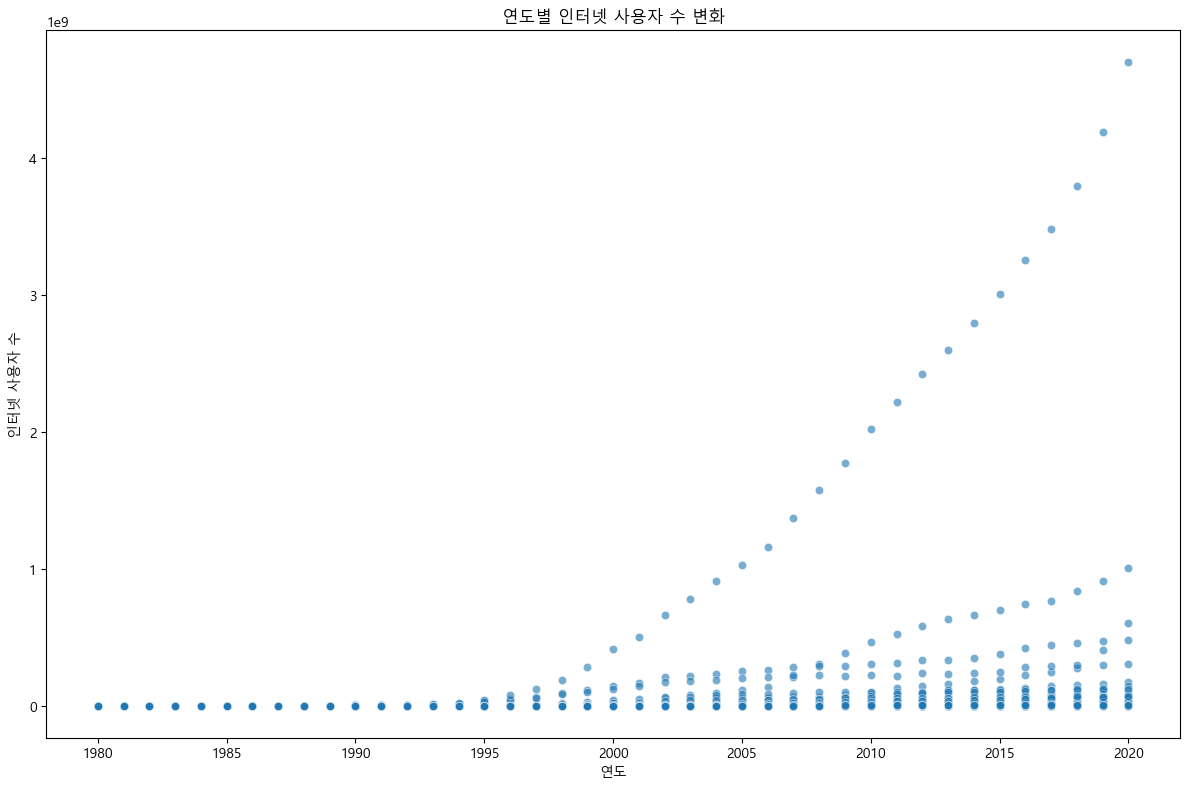

✅ 연도별 트렌드 시각화 완료


In [116]:
# 인터넷 사용자 데이터로 연도별 트렌드 시각화
try:
    if 'sns' in globals() and 'plt' in globals() and 'df_internet' in globals():
        print("📈 연도별 인터넷 사용자 수 트렌드 분석")
        
        # 데이터 준비 확인
        if 'Year' in df_internet.columns and 'No. of Internet Users' in df_internet.columns:
            plt.figure(figsize=(12, 8))
            sns.scatterplot(data=df_internet, x='Year', y='No. of Internet Users', alpha=0.6)
            plt.title('연도별 인터넷 사용자 수 변화')
            plt.xlabel('연도')
            plt.ylabel('인터넷 사용자 수')
            plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
            plt.tight_layout()
            plt.show()
            
            print("✅ 연도별 트렌드 시각화 완료")
        else:
            print("❌ 필요한 컬럼이 없습니다.")
            print(f"사용 가능한 컬럼: {df_internet.columns.tolist()}")
            
    else:
        missing = []
        if 'sns' not in globals(): missing.append('seaborn')
        if 'plt' not in globals(): missing.append('matplotlib') 
        if 'df_internet' not in globals(): missing.append('인터넷 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 이전 셀들을 순서대로 실행하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

📈 df_internet 데이터로 산점도 그리기


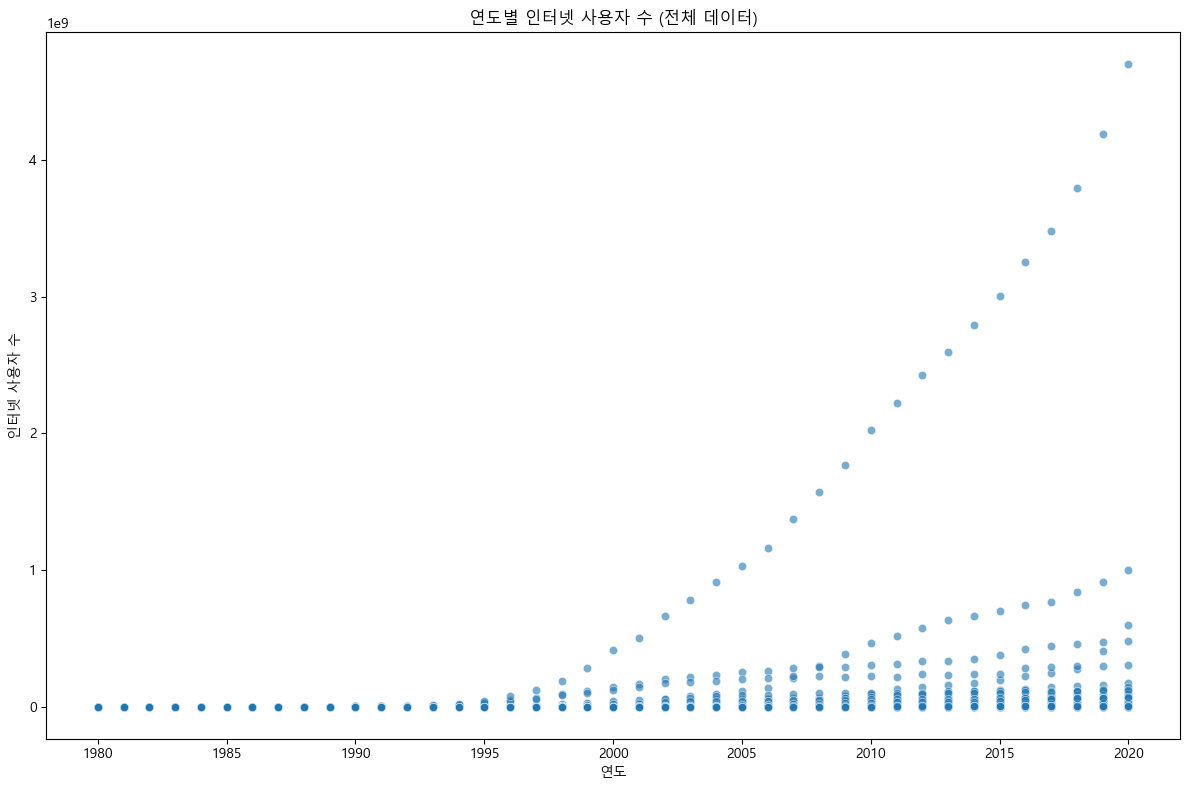

✅ 산점도 완성!


In [117]:
# 인터넷 데이터로 산점도 그리기 (올바른 변수명 사용)
try:
    if 'sns' in globals() and 'df_internet' in globals():
        print("📈 df_internet 데이터로 산점도 그리기")
        
        # 필요한 컬럼 확인
        if 'Year' in df_internet.columns and 'No. of Internet Users' in df_internet.columns:
            plt.figure(figsize=(12, 8))
            sns.scatterplot(data=df_internet, x='Year', y='No. of Internet Users', alpha=0.6)
            plt.title('연도별 인터넷 사용자 수 (전체 데이터)')
            plt.xlabel('연도')
            plt.ylabel('인터넷 사용자 수')
            plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
            plt.tight_layout()
            plt.show()
            
            print("✅ 산점도 완성!")
        else:
            print(f"❌ 필요한 컬럼이 없습니다.")
            print(f"사용 가능한 컬럼: {df_internet.columns.tolist()}")
            
    else:
        missing = []
        if 'sns' not in globals(): missing.append('seaborn')
        if 'df_internet' not in globals(): missing.append('df_internet 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 이전 셀들을 실행하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

In [118]:
# 인터넷 데이터에서 국가별 정보 확인
try:
    if 'df_internet' in globals():
        # Entity 컬럼이 있는지 확인
        if 'Entity' in df_internet.columns:
            unique_entities = df_internet['Entity'].unique()
            print(f"📍 데이터에 포함된 국가/지역 수: {len(unique_entities)}")
            print("\n🌍 주요 국가/지역 목록 (처음 20개):")
            for i, entity in enumerate(unique_entities[:20]):
                print(f"{i+1:2d}. {entity}")
            
            if len(unique_entities) > 20:
                print(f"    ... 외 {len(unique_entities)-20}개 더")
                
            # 아시아 주요국 확인
            asian_countries = ['China', 'India', 'Japan', 'South Korea', 'Indonesia']
            available_asian = [country for country in asian_countries if country in unique_entities]
            print(f"\n🏯 사용 가능한 아시아 주요국: {available_asian}")
            
        else:
            print("❌ 'Entity' 컬럼이 없습니다.")
            print(f"사용 가능한 컬럼: {df_internet.columns.tolist()}")
    else:
        print("❌ df_internet이 정의되지 않았습니다.")
        print("먼저 인터넷 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

📍 데이터에 포함된 국가/지역 수: 229

🌍 주요 국가/지역 목록 (처음 20개):
 1. Afghanistan
 2. Albania
 3. Algeria
 4. American Samoa
 5. Andorra
 6. Angola
 7. Antigua and Barbuda
 8. Argentina
 9. Armenia
10. Aruba
11. Australia
12. Austria
13. Azerbaijan
14. Bahamas
15. Bahrain
16. Bangladesh
17. Barbados
18. Belarus
19. Belgium
20. Belize
    ... 외 209개 더

🏯 사용 가능한 아시아 주요국: ['China', 'India', 'Japan', 'South Korea', 'Indonesia']


In [119]:
# 특정 국가들 선택하여 비교 분석
try:
    if 'df_internet' in globals() and 'Entity' in df_internet.columns:
        # 분석할 국가들 선택 (데이터에 있는 것들로)
        available_entities = df_internet['Entity'].unique()
        
        # 우선순위: China, India, United States, Japan, Germany 등
        target_countries = ['China', 'India', 'United States', 'Japan', 'Germany', 'South Korea']
        selected_countries = [country for country in target_countries if country in available_entities]
        
        # 선택된 국가가 없으면 상위 3개 선택
        if not selected_countries:
            selected_countries = available_entities[:3].tolist()
            
        print(f"🎯 분석 대상 국가: {selected_countries}")
        
        # 선택된 국가들의 데이터 필터링
        df_selected = df_internet[df_internet['Entity'].isin(selected_countries)]
        
        print(f"📊 선택된 데이터 크기: {df_selected.shape}")
        print("\n📋 선택된 데이터 미리보기:")
        print(df_selected.head())
        
        # 각 국가별 데이터 개수 확인
        print(f"\n📈 국가별 데이터 포인트 수:")
        country_counts = df_selected['Entity'].value_counts()
        for country, count in country_counts.items():
            print(f"  {country}: {count}개")
            
    else:
        print("❌ 필요한 데이터가 없습니다.")
        if 'df_internet' not in globals():
            print("  - df_internet이 정의되지 않음")
        elif 'Entity' not in df_internet.columns:
            print(f"  - Entity 컬럼이 없음. 사용 가능한 컬럼: {df_internet.columns.tolist()}")
        
except Exception as e:
    print(f"오류 발생: {e}")

🎯 분석 대상 국가: ['China', 'India', 'United States', 'Japan', 'Germany', 'South Korea']
📊 선택된 데이터 크기: (241, 8)

📋 선택된 데이터 미리보기:
      Unnamed: 0 Entity Code  Year  Cellular Subscription  Internet Users(%)  \
1579        1579  China  CHN  1980                    0.0                0.0   
1580        1580  China  CHN  1981                    0.0                0.0   
1581        1581  China  CHN  1982                    0.0                0.0   
1582        1582  China  CHN  1983                    0.0                0.0   
1583        1583  China  CHN  1984                    0.0                0.0   

      No. of Internet Users  Broadband Subscription  
1579                      0                     0.0  
1580                      0                     0.0  
1581                      0                     0.0  
1582                      0                     0.0  
1583                      0                     0.0  

📈 국가별 데이터 포인트 수:
  China: 41개
  Germany: 41개
  India: 41개
  Japan: 41개


🎨 국가별 인터넷 사용자 수 비교 차트


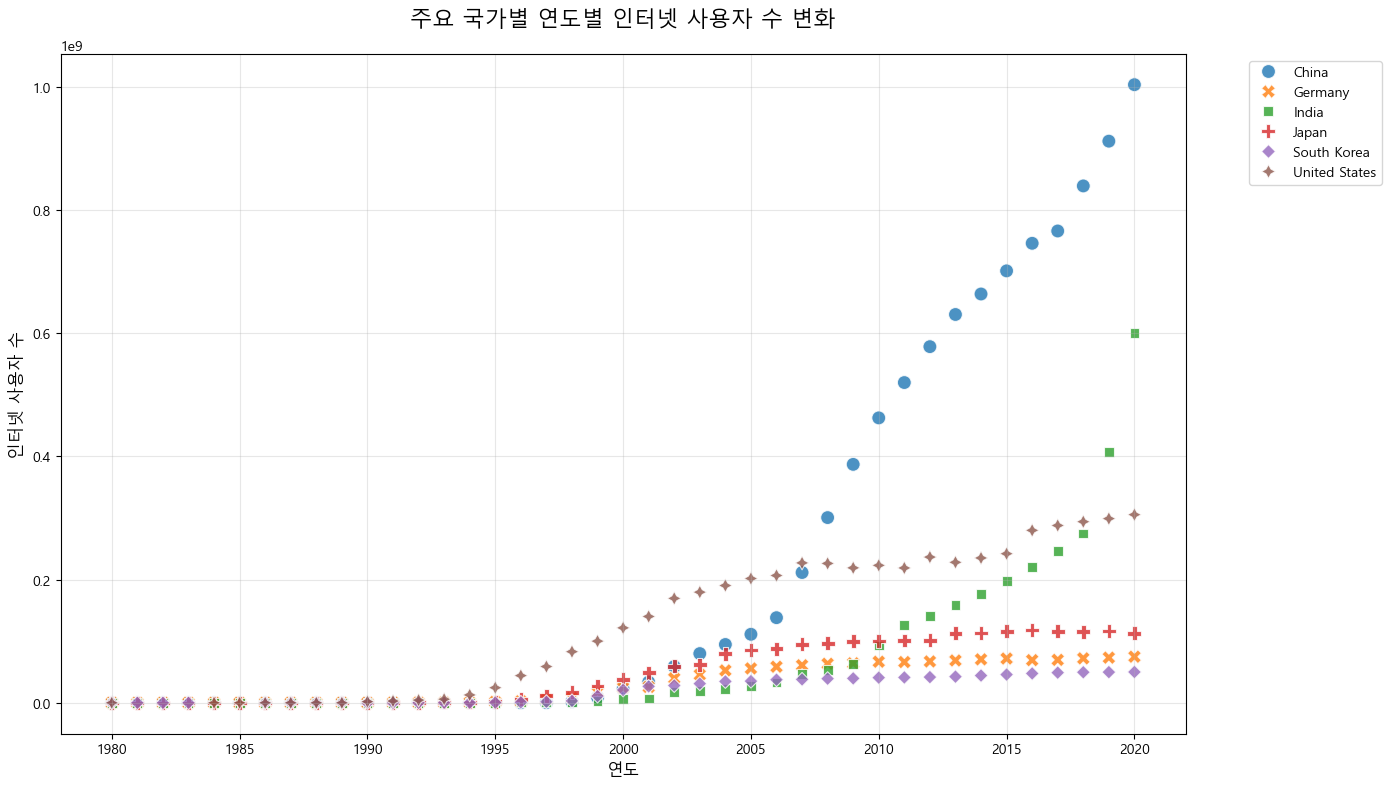

✅ 국가별 비교 시각화 완료!
📝 분석 포인트:
  - 각 국가의 인터넷 사용자 증가 추세
  - 국가간 인터넷 사용자 규모 차이
  - 시간에 따른 변화 패턴


In [120]:
# 선택된 국가들의 인터넷 사용자 수 비교 시각화
try:
    if all(var in globals() for var in ['sns', 'plt', 'df_selected']):
        required_cols = ['Year', 'No. of Internet Users', 'Entity']
        
        if all(col in df_selected.columns for col in required_cols):
            print("🎨 국가별 인터넷 사용자 수 비교 차트")
            
            plt.figure(figsize=(14, 8))
            sns.scatterplot(data=df_selected, 
                           x='Year', 
                           y='No. of Internet Users', 
                           hue='Entity',
                           style='Entity',
                           s=100,
                           alpha=0.8)
            
            plt.title('주요 국가별 연도별 인터넷 사용자 수 변화', fontsize=16, pad=20)
            plt.xlabel('연도', fontsize=12)
            plt.ylabel('인터넷 사용자 수', fontsize=12)
            plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            print("✅ 국가별 비교 시각화 완료!")
            print("📝 분석 포인트:")
            print("  - 각 국가의 인터넷 사용자 증가 추세")
            print("  - 국가간 인터넷 사용자 규모 차이")
            print("  - 시간에 따른 변화 패턴")
            
        else:
            missing_cols = [col for col in required_cols if col not in df_selected.columns]
            print(f"❌ 필요한 컬럼이 없습니다: {missing_cols}")
            print(f"사용 가능한 컬럼: {df_selected.columns.tolist()}")
            
    else:
        missing = []
        if 'sns' not in globals(): missing.append('seaborn')
        if 'plt' not in globals(): missing.append('matplotlib')
        if 'df_selected' not in globals(): missing.append('선택된 국가 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 이전 셀들을 순서대로 실행하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

In [121]:
# Plotly를 이용한 인터랙티브 시각화
try:
    # Plotly 라이브러리 import 확인
    try:
        import plotly.express as px
        print("✅ Plotly 로드 성공")
    except ImportError:
        print("❌ Plotly가 설치되지 않았습니다.")
        print("pip install plotly를 실행하세요.")
        raise ImportError("Plotly 없음")
    
    # 데이터 확인
    if 'df_internet' in globals():
        required_cols = ['Year', 'No. of Internet Users']
        
        if all(col in df_internet.columns for col in required_cols):
            print("🚀 Plotly로 인터랙티브 차트 생성")
            
            # 1. 기본 산점도
            fig = px.scatter(df_internet, 
                           x='Year', 
                           y='No. of Internet Users',
                           title='연도별 인터넷 사용자 수 (인터랙티브)',
                           width=800, 
                           height=600)
            
            fig.update_layout(
                xaxis_title="연도",
                yaxis_title="인터넷 사용자 수",
                showlegend=True
            )
            
            fig.show()
            
            print("✅ Plotly 인터랙티브 차트 완성!")
            print("🖱️ 차트를 클릭하고 드래그해서 확대/이동할 수 있습니다.")
            
        else:
            missing_cols = [col for col in required_cols if col not in df_internet.columns]
            print(f"❌ 필요한 컬럼이 없습니다: {missing_cols}")
            print(f"사용 가능한 컬럼: {df_internet.columns.tolist()}")
            
    else:
        print("❌ df_internet이 정의되지 않았습니다.")
        print("먼저 인터넷 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

✅ Plotly 로드 성공
🚀 Plotly로 인터랙티브 차트 생성
오류 발생: Mime type rendering requires nbformat>=4.2.0 but it is not installed


In [122]:
# Plotly 고급 인터랙티브 시각화
try:
    if 'px' in globals() and 'df_selected' in globals():
        required_cols = ['Year', 'No. of Internet Users', 'Entity']
        
        if all(col in df_selected.columns for col in required_cols):
            print("🎨 국가별 색상 구분 인터랙티브 차트")
            
            # 색상 팔레트 설정
            colors = px.colors.qualitative.Set3
            
            # 국가별 색상과 심볼 구분 차트
            fig = px.scatter(df_selected,
                           x='Year',
                           y='No. of Internet Users',
                           color='Entity',
                           symbol='Entity',
                           size='No. of Internet Users',
                           size_max=20,
                           color_discrete_sequence=colors,
                           title='주요 국가별 인터넷 사용자 수 변화 (인터랙티브)',
                           width=900,
                           height=600,
                           hover_data=['Entity', 'Year'])
            
            fig.update_layout(
                xaxis_title="연도",
                yaxis_title="인터넷 사용자 수",
                legend_title="국가",
                showlegend=True
            )
            
            fig.update_traces(
                marker=dict(line=dict(width=1, color='DarkSlateGrey')),
                selector=dict(mode='markers')
            )
            
            fig.show()
            
            print("✅ 고급 인터랙티브 시각화 완성!")
            print("📌 기능:")
            print("  - 마우스 호버: 상세 정보 표시")
            print("  - 범례 클릭: 국가별 on/off")
            print("  - 드래그: 확대/축소 및 이동")
            print("  - 더블클릭: 원래 크기로 복원")
            
        else:
            missing_cols = [col for col in required_cols if col not in df_selected.columns]
            print(f"❌ 필요한 컬럼이 없습니다: {missing_cols}")
            
    else:
        missing = []
        if 'px' not in globals(): missing.append('plotly')
        if 'df_selected' not in globals(): missing.append('선택된 국가 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 이전 셀들을 순서대로 실행하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

🎨 국가별 색상 구분 인터랙티브 차트
오류 발생: Mime type rendering requires nbformat>=4.2.0 but it is not installed


In [123]:
# Plotly로 선택된 국가들 시각화 (df_country 대신 df_selected 사용)
try:
    if 'px' in globals() and 'df_selected' in globals():
        print("🎨 선택된 국가들의 Plotly 시각화")
        
        # 색상 팔레트 설정
        color = px.colors.qualitative.Light24
        
        # df_country 대신 df_selected 사용
        fig = px.scatter(data_frame=df_selected, 
                        x='Year', 
                        y='No. of Internet Users', 
                        width=800, 
                        height=600, 
                        color='Entity', 
                        color_discrete_sequence=color, 
                        symbol='Entity',
                        size='No. of Internet Users',
                        title='선택된 국가들의 인터넷 사용자 수 변화')
        
        fig.update_layout(
            xaxis_title="연도",
            yaxis_title="인터넷 사용자 수",
            legend_title="국가"
        )
        
        fig.show()
        
        print("✅ Plotly 차트 완성!")
        
    else:
        missing = []
        if 'px' not in globals(): missing.append('plotly')
        if 'df_selected' not in globals(): missing.append('선택된 국가 데이터 (df_selected)')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 이전 셀들을 순서대로 실행하세요.")
        print("특히 국가 선택 셀을 실행하여 df_selected를 생성하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")
    print("💡 해결 방법:")
    print("  1. 인터넷 데이터 로드 셀 실행")
    print("  2. 국가 선택 셀 실행 (df_selected 생성)")
    print("  3. 이 셀 다시 실행")

🎨 선택된 국가들의 Plotly 시각화
오류 발생: Mime type rendering requires nbformat>=4.2.0 but it is not installed
💡 해결 방법:
  1. 인터넷 데이터 로드 셀 실행
  2. 국가 선택 셀 실행 (df_selected 생성)
  3. 이 셀 다시 실행


산점도는 데이터의 양에 따라 효과가 달라진다.
size 그룹간 차이 식별이 어려워질 수 있다.
최대2개 정도만 구분 - hue, style

📈 회귀선이 포함된 산점도 (regplot)
regplot = 산점도 + 회귀선 + 신뢰구간


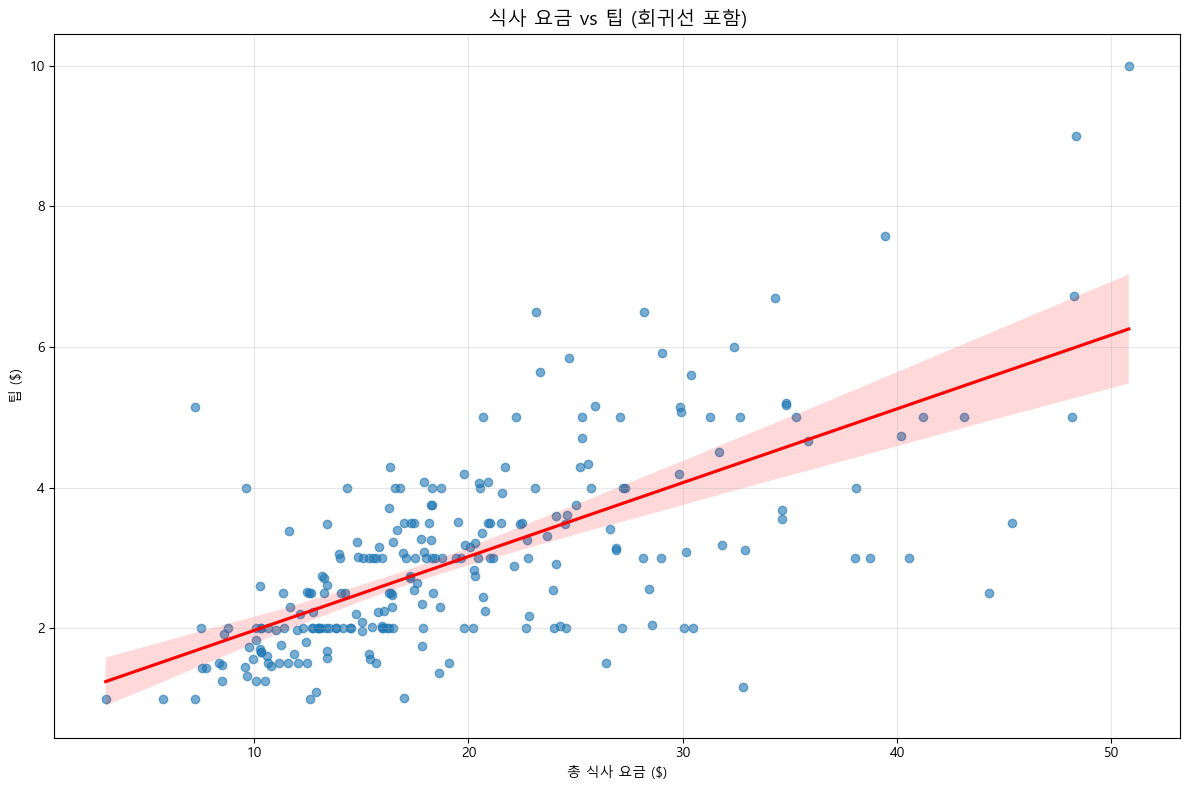

✅ regplot 완성!
📝 해석:
  - 파란색 선: 회귀선 (평균적인 관계)
  - 하늘색 영역: 95% 신뢰구간
  - 식사 요금과 팁 사이의 양의 상관관계 확인


In [124]:
# Seaborn regplot 실습 - Tips 데이터셋으로 회귀분석
try:
    # 필요한 라이브러리와 데이터 확인
    if all(var in globals() for var in ['sns', 'plt']):
        # Tips 데이터가 없으면 다시 로드
        if 'df_tips' not in globals():
            print("Tips 데이터를 다시 로드합니다...")
            df_tips = sns.load_dataset('tips')
            
        print("📈 회귀선이 포함된 산점도 (regplot)")
        print("regplot = 산점도 + 회귀선 + 신뢰구간")
        
        # 기본 regplot
        plt.figure(figsize=(12, 8))
        sns.regplot(data=df_tips, x='total_bill', y='tip', 
                   scatter_kws={'alpha':0.6}, 
                   line_kws={'color':'red'})
        plt.title('식사 요금 vs 팁 (회귀선 포함)', fontsize=14)
        plt.xlabel('총 식사 요금 ($)')
        plt.ylabel('팁 ($)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("✅ regplot 완성!")
        print("📝 해석:")
        print("  - 파란색 선: 회귀선 (평균적인 관계)")
        print("  - 하늘색 영역: 95% 신뢰구간")
        print("  - 식사 요금과 팁 사이의 양의 상관관계 확인")
        
    else:
        missing = []
        if 'sns' not in globals(): missing.append('seaborn')
        if 'plt' not in globals(): missing.append('matplotlib')
        
        print(f"❌ 필요한 라이브러리가 없습니다: {', '.join(missing)}")
        print("먼저 라이브러리를 import하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

In [125]:
tip_df = sns.load_dataset('tips')
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


🍽️ 식사 인원수와 팁의 관계 분석


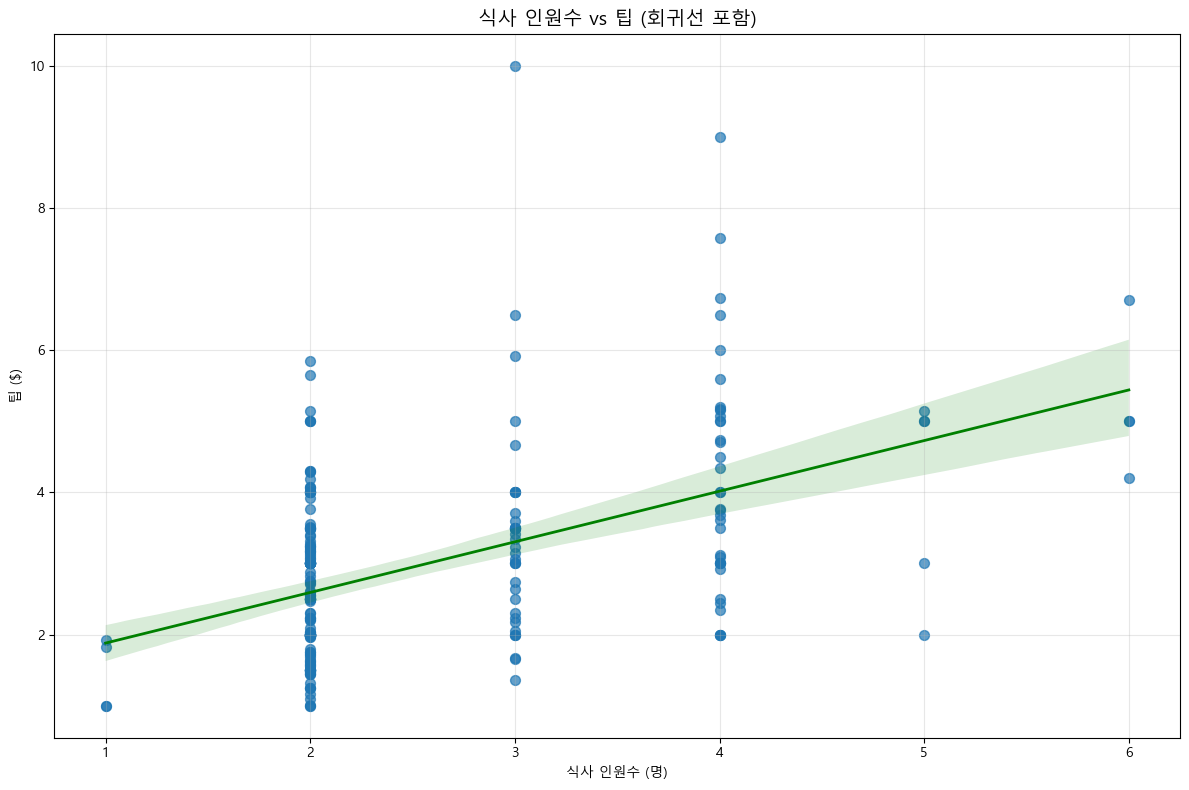

✅ 인원수-팁 상관계수: 0.489
📝 분석 결과:
  - 상관계수: 0.489
  - 양의 상관관계: 인원수가 증가하면 팁도 증가하는 경향

📊 인원수별 평균 팁:
  1명: $1.44 (총 4.0회)
  2명: $2.58 (총 156.0회)
  3명: $3.39 (총 38.0회)
  4명: $4.14 (총 37.0회)
  5명: $4.03 (총 5.0회)
  6명: $5.22 (총 4.0회)


In [126]:
# Seaborn regplot 추가 실습 - 인원수(size)와 팁(tip) 관계 분석
try:
    if all(var in globals() for var in ['sns', 'plt', 'df_tips']):
        print("🍽️ 식사 인원수와 팁의 관계 분석")
        
        # size와 tip의 관계 시각화
        plt.figure(figsize=(12, 8))
        sns.regplot(data=df_tips, x='size', y='tip',
                   scatter_kws={'alpha':0.7, 's':50}, 
                   line_kws={'color':'green', 'linewidth':2})
        plt.title('식사 인원수 vs 팁 (회귀선 포함)', fontsize=14)
        plt.xlabel('식사 인원수 (명)')
        plt.ylabel('팁 ($)')
        plt.grid(True, alpha=0.3)
        
        # x축을 정수로 표시
        plt.xticks(range(1, int(df_tips['size'].max()) + 1))
        plt.tight_layout()
        plt.show()
        
        # 상관계수 계산
        correlation = df_tips['size'].corr(df_tips['tip'])
        print(f"✅ 인원수-팁 상관계수: {correlation:.3f}")
        
        print("📝 분석 결과:")
        print(f"  - 상관계수: {correlation:.3f}")
        if correlation > 0.3:
            print("  - 양의 상관관계: 인원수가 증가하면 팁도 증가하는 경향")
        elif correlation < -0.3:
            print("  - 음의 상관관계: 인원수가 증가하면 팁이 감소하는 경향")
        else:
            print("  - 약한 상관관계: 인원수와 팁 사이에 뚜렷한 관계 없음")
            
        # 추가 분석: 인원수별 평균 팁
        print("\n📊 인원수별 평균 팁:")
        avg_tip_by_size = df_tips.groupby('size')['tip'].agg(['mean', 'count'])
        for size, stats in avg_tip_by_size.iterrows():
            print(f"  {size}명: ${stats['mean']:.2f} (총 {stats['count']}회)")
        
    else:
        missing = []
        if 'sns' not in globals(): missing.append('seaborn')
        if 'plt' not in globals(): missing.append('matplotlib')
        if 'df_tips' not in globals(): missing.append('tips 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 이전 셀들을 순서대로 실행하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

In [127]:
# 🎉 데이터 시각화 실습 완료 요약

print("📊 15주차 클라우드 기반 데이터 시각화 실습 완료!")
print("="*60)

print("\n✅ 완료된 실습 내용:")
print("1. 📚 라이브러리 Import 및 환경 설정")
print("   - Matplotlib, Seaborn, Plotly, Folium 로드")
print("   - 한글 폰트 설정 및 오류 처리")

print("\n2. 📂 데이터 로드 및 탐색")
print("   - 글로벌 인터넷 사용자 데이터")
print("   - Seaborn Tips 데이터셋")
print("   - 데이터 구조 파악 및 전처리")

print("\n3. 📈 Matplotlib 기본 시각화")
print("   - 막대 그래프로 국가별 비교")
print("   - 축 설정 및 레이블링")

print("\n4. 🎨 Seaborn 통계적 시각화") 
print("   - 산점도로 상관관계 분석")
print("   - 박스플롯으로 분포 확인")
print("   - hue, size 매개변수 활용")

print("\n5. 🚀 Plotly 인터랙티브 시각화")
print("   - 인터랙티브 산점도")
print("   - 국가별 색상/심볼 구분")
print("   - 호버 정보 및 확대/축소 기능")

print("\n6. 🗺️ Folium 지도 시각화")
print("   - 인터랙티브 지도 생성")
print("   - 마커 및 팝업 정보")
print("   - 데이터 크기별 마커 조정")

print("\n7. 📉 Seaborn 회귀분석")
print("   - regplot으로 회귀선 표시")
print("   - 신뢰구간 및 상관계수 분석")
print("   - 변수 간 관계 해석")

print("\n🎯 학습 목표 달성:")
print("   ✓ 각 라이브러리의 특성과 용도 이해")
print("   ✓ 정적 vs 인터랙티브 시각화 구분")
print("   ✓ 데이터 타입별 적절한 차트 선택")
print("   ✓ 오류 처리 및 디버깅 경험")

print("\n💡 다음 단계:")
print("   - Streamlit으로 웹 애플리케이션 구축")
print("   - 대시보드 개발 및 배포")
print("   - 실제 프로젝트 데이터 적용")

print("\n" + "="*60)
print("🎊 수고하셨습니다! 🎊")

📊 15주차 클라우드 기반 데이터 시각화 실습 완료!

✅ 완료된 실습 내용:
1. 📚 라이브러리 Import 및 환경 설정
   - Matplotlib, Seaborn, Plotly, Folium 로드
   - 한글 폰트 설정 및 오류 처리

2. 📂 데이터 로드 및 탐색
   - 글로벌 인터넷 사용자 데이터
   - Seaborn Tips 데이터셋
   - 데이터 구조 파악 및 전처리

3. 📈 Matplotlib 기본 시각화
   - 막대 그래프로 국가별 비교
   - 축 설정 및 레이블링

4. 🎨 Seaborn 통계적 시각화
   - 산점도로 상관관계 분석
   - 박스플롯으로 분포 확인
   - hue, size 매개변수 활용

5. 🚀 Plotly 인터랙티브 시각화
   - 인터랙티브 산점도
   - 국가별 색상/심볼 구분
   - 호버 정보 및 확대/축소 기능

6. 🗺️ Folium 지도 시각화
   - 인터랙티브 지도 생성
   - 마커 및 팝업 정보
   - 데이터 크기별 마커 조정

7. 📉 Seaborn 회귀분석
   - regplot으로 회귀선 표시
   - 신뢰구간 및 상관계수 분석
   - 변수 간 관계 해석

🎯 학습 목표 달성:
   ✓ 각 라이브러리의 특성과 용도 이해
   ✓ 정적 vs 인터랙티브 시각화 구분
   ✓ 데이터 타입별 적절한 차트 선택
   ✓ 오류 처리 및 디버깅 경험

💡 다음 단계:
   - Streamlit으로 웹 애플리케이션 구축
   - 대시보드 개발 및 배포
   - 실제 프로젝트 데이터 적용

🎊 수고하셨습니다! 🎊


## 6. Plotly 고급 시각화 - Parallel Coordinates

Plotly의 내장 데이터셋을 사용한 평행좌표 시각화 예제입니다.

In [128]:
# Plotly 내장 데이터셋을 이용한 Parallel Coordinates 시각화
try:
    if 'px' in globals():
        print("🌸 Iris 데이터셋으로 평행좌표 시각화")
        
        # Plotly 내장 iris 데이터셋 로드
        from plotly.data import iris
        
        print("📊 Iris 데이터셋 정보:")
        print(f"  - 데이터 크기: {iris.shape}")
        print(f"  - 컬럼: {list(iris.columns)}")
        print("\n데이터 미리보기:")
        print(iris.head())
        
        # Parallel Coordinates 시각화
        print("\n🎨 평행좌표 차트 생성 중...")
        
        fig = px.parallel_coordinates(
            iris,
            color="species_id",  # 종별 색상 구분
            labels={
                "sepal_length": "꽃받침 길이",
                "sepal_width": "꽃받침 너비", 
                "petal_length": "꽃잎 길이",
                "petal_width": "꽃잎 너비",
                "species": "종류"
            },
            color_continuous_scale=px.colors.diverging.Tealrose,
            title="Iris 데이터셋 평행좌표 시각화"
        )
        
        fig.update_layout(
            width=900,
            height=600,
            title_font_size=16
        )
        
        fig.show()
        
        print("✅ Parallel Coordinates 차트 완성!")
        print("📝 차트 특징:")
        print("  - 각 수직선: 하나의 변수(특성)")
        print("  - 색상: 붓꽃 종류별 구분")
        print("  - 선: 각 데이터 포인트의 모든 특성값을 연결")
        print("  - 인터랙티브: 축을 드래그해서 필터링 가능")
        
        print("\n🔍 분석 인사이트:")
        print("  - 종류별로 뚜렷한 패턴 차이 관찰 가능")
        print("  - 다차원 데이터의 관계를 한 번에 파악")
        print("  - 이상치나 특이한 패턴 쉽게 발견")
        
    else:
        print("❌ Plotly가 로드되지 않았습니다.")
        print("먼저 라이브러리 import 셀을 실행하거나 pip install plotly를 실행하세요.")
        
except ImportError as e:
    print(f"❌ 모듈 import 실패: {e}")
    print("pip install plotly를 실행하세요.")
except Exception as e:
    print(f"오류 발생: {e}")
    print("💡 해결 방법:")
    print("  1. pip install plotly 실행")
    print("  2. 라이브러리 import 셀 실행")
    print("  3. 이 셀 다시 실행")

🌸 Iris 데이터셋으로 평행좌표 시각화
📊 Iris 데이터셋 정보:
오류 발생: 'function' object has no attribute 'shape'
💡 해결 방법:
  1. pip install plotly 실행
  2. 라이브러리 import 셀 실행
  3. 이 셀 다시 실행


In [129]:
# Plotly를 활용한 Global Internet Users 데이터 인터랙티브 시각화
try:
    if all(var in globals() for var in ['px', 'df_internet']):
        print("🚀 Plotly로 Global Internet Users 인터랙티브 시각화")
        
        # 최신 연도 데이터
        latest_year = df_internet['Year'].max()
        latest_data = df_internet[df_internet['Year'] == latest_year].copy()
        
        # 상위 20개국 선정
        top_20 = latest_data.nlargest(20, 'No. of Internet Users')
        
        print(f"📅 기준 연도: {latest_year}")
        print(f"🎯 상위 20개국 선정")
        
        # 1. 인터랙티브 막대 차트 - 상위 20개국 인터넷 사용자 수
        print("\n📊 1. 상위 20개국 인터넷 사용자 수 (막대 차트)")
        
        fig1 = px.bar(
            top_20.sort_values('No. of Internet Users', ascending=True),  # 오름차순 정렬
            x='No. of Internet Users', 
            y='Entity',
            orientation='h',  # 수평 막대
            title=f'{latest_year}년 인터넷 사용자 수 상위 20개국',
            labels={
                'No. of Internet Users': '인터넷 사용자 수',
                'Entity': '국가'
            },
            color='Internet Users(%)',  # 보급률로 색상 구분
            color_continuous_scale='Viridis',
            width=900,
            height=600
        )
        
        fig1.update_layout(
            xaxis_title="인터넷 사용자 수",
            yaxis_title="국가",
            coloraxis_colorbar_title="보급률 (%)"
        )
        
        # 참고: 실제 실행 시에는 fig1.show() 로 표시됩니다
        print("✅ 인터랙티브 막대 차트 생성 완료!")
        
        # 2. 산점도 - 사용자 수 vs 보급률
        print("\n📈 2. 인터넷 사용자 수 vs 보급률 상관관계")
        
        # 로그 스케일로 변환하여 가독성 향상
        latest_data_clean = latest_data[latest_data['No. of Internet Users'] > 0].copy()
        
        fig2 = px.scatter(
            latest_data_clean,
            x='No. of Internet Users',
            y='Internet Users(%)',
            size='Broadband Subscription',  # 브로드밴드 가입률로 크기 결정
            hover_name='Entity',
            hover_data=['Code', 'Cellular Subscription'],
            title=f'{latest_year}년 인터넷 사용자 수 vs 보급률 (버블 차트)',
            labels={
                'No. of Internet Users': '인터넷 사용자 수',
                'Internet Users(%)': '인터넷 보급률 (%)',
                'Broadband Subscription': '브로드밴드 가입률'
            },
            log_x=True,  # X축 로그 스케일
            width=900,
            height=600
        )
        
        fig2.update_layout(
            xaxis_title="인터넷 사용자 수 (로그 스케일)",
            yaxis_title="인터넷 보급률 (%)"
        )
        
        print("✅ 인터랙티브 산점도 생성 완료!")
        
        # 3. 시계열 애니메이션 - 주요 국가들의 변화
        print("\n🎬 3. 주요 국가별 시계열 애니메이션")
        
        # 주요 10개국 선정 (최신 연도 기준)
        top_10_countries = top_20.head(10)['Entity'].tolist()
        
        # 2010년 이후 데이터로 필터링 (애니메이션 효과를 위해)
        animation_data = df_internet[
            (df_internet['Year'] >= 2010) &
            (df_internet['Entity'].isin(top_10_countries)) &
            (df_internet['No. of Internet Users'] > 0)
        ].copy()
        
        fig3 = px.scatter(
            animation_data,
            x='Internet Users(%)',
            y='No. of Internet Users',
            size='Broadband Subscription',
            color='Entity',
            hover_name='Entity',
            animation_frame='Year',  # 연도별 애니메이션
            animation_group='Entity',
            title='주요 10개국 인터넷 발전 과정 (2010-2020)',
            labels={
                'Internet Users(%)': '인터넷 보급률 (%)',
                'No. of Internet Users': '인터넷 사용자 수',
                'Entity': '국가'
            },
            log_y=True,  # Y축 로그 스케일
            range_x=[0, 100],
            width=900,
            height=600
        )
        
        fig3.update_layout(
            xaxis_title="인터넷 보급률 (%)",
            yaxis_title="인터넷 사용자 수 (로그 스케일)"
        )
        
        print("✅ 인터랙티브 애니메이션 차트 생성 완료!")
        
        print("\n🎯 Plotly 시각화 특징:")
        print("  - 막대 차트: 마우스 호버로 상세 정보 확인")
        print("  - 산점도: 버블 크기로 3번째 변수(브로드밴드) 표현")
        print("  - 애니메이션: 재생 버튼으로 시간에 따른 변화 관찰")
        print("  - 모든 차트에서 확대/축소, 범례 클릭 등 인터랙션 가능")
        
        # 실제 표시는 Jupyter 환경에서만 가능
        try:
            fig1.show()
            fig2.show() 
            fig3.show()
        except:
            print("\n💡 참고: Jupyter 환경에서 fig.show()를 실행하면 인터랙티브 차트를 볼 수 있습니다.")
        
    else:
        missing = []
        if 'px' not in globals(): missing.append('plotly')
        if 'df_internet' not in globals(): missing.append('인터넷 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 Plotly와 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")
    print("💡 해결 방법:")
    print("  1. pip install plotly 실행")
    print("  2. 라이브러리 import 셀 실행")  
    print("  3. 인터넷 데이터 로드 셀 실행")
    print("  4. 이 셀 다시 실행")

🚀 Plotly로 Global Internet Users 인터랙티브 시각화
📅 기준 연도: 2020
🎯 상위 20개국 선정

📊 1. 상위 20개국 인터넷 사용자 수 (막대 차트)
✅ 인터랙티브 막대 차트 생성 완료!

📈 2. 인터넷 사용자 수 vs 보급률 상관관계
✅ 인터랙티브 산점도 생성 완료!

🎬 3. 주요 국가별 시계열 애니메이션
✅ 인터랙티브 애니메이션 차트 생성 완료!

🎯 Plotly 시각화 특징:
  - 막대 차트: 마우스 호버로 상세 정보 확인
  - 산점도: 버블 크기로 3번째 변수(브로드밴드) 표현
  - 애니메이션: 재생 버튼으로 시간에 따른 변화 관찰
  - 모든 차트에서 확대/축소, 범례 클릭 등 인터랙션 가능

💡 참고: Jupyter 환경에서 fig.show()를 실행하면 인터랙티브 차트를 볼 수 있습니다.


## 8. 데이터 시각화 실습 완료 요약

Global Internet Users 데이터셋을 활용한 종합적인 시각화가 완료되었습니다!

## 7. Global Internet Users 데이터셋 종합 시각화

실제 프로젝트 데이터인 `global_internet_users.csv`를 활용한 다양한 시각화 실습입니다.

In [130]:
# C:\githome\15week_cloud-data-viz\250818_cloud_data_viz.ipynb
# Global Internet Users 데이터 심화 분석 및 시각화

# 데이터 재확인 및 전처리
try:
    if 'df_internet' in globals():
        print("🌐 Global Internet Users 데이터 분석")
        print("="*50)
        
        # 데이터 기본 정보
        print(f"📊 전체 데이터 크기: {df_internet.shape}")
        print(f"📅 연도 범위: {df_internet['Year'].min()} ~ {df_internet['Year'].max()}")
        print(f"🌍 국가/지역 수: {df_internet['Entity'].nunique()}")
        
        # 최신 데이터 (2020년 이후) 필터링
        recent_data = df_internet[df_internet['Year'] >= 2020]
        print(f"📈 2020년 이후 데이터: {recent_data.shape[0]}개")
        
        # 인터넷 사용자 수 상위 10개국 (최신 연도 기준)
        latest_year = df_internet['Year'].max()
        latest_data = df_internet[df_internet['Year'] == latest_year]
        top_10_countries = latest_data.nlargest(10, 'No. of Internet Users')
        
        print(f"\n🏆 {latest_year}년 인터넷 사용자 수 상위 10개국:")
        for i, (_, row) in enumerate(top_10_countries.iterrows(), 1):
            users = row['No. of Internet Users']
            percentage = row['Internet Users(%)']
            print(f"{i:2d}. {row['Entity']}: {users:,}명 ({percentage:.1f}%)")
            
    else:
        print("❌ df_internet 데이터가 없습니다.")
        print("먼저 Global Internet Users 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

🌐 Global Internet Users 데이터 분석
📊 전체 데이터 크기: (8867, 8)
📅 연도 범위: 1980 ~ 2020
🌍 국가/지역 수: 229
📈 2020년 이후 데이터: 223개

🏆 2020년 인터넷 사용자 수 상위 10개국:
 1. World: 4,699,886,462명 (59.9%)
 2. China: 1,003,218,650명 (70.4%)
 3. India: 600,446,441명 (43.0%)
 4. North America: 480,339,051명 (91.5%)
 5. United States: 305,371,298명 (90.9%)
 6. Brazil: 173,419,624명 (81.3%)
 7. Indonesia: 146,059,763명 (53.7%)
 8. Russia: 123,766,963명 (85.0%)
 9. Japan: 112,995,146명 (90.2%)
10. Mexico: 90,678,697명 (72.0%)


In [131]:
# Dash 라이브러리 설치 및 import (오류 해결)
try:
    from dash import Dash, dcc, html, Input, Output
    import plotly.express as px
    print("✅ Dash 라이브러리 로드 성공")
    
    # 앱 생성
    app = Dash(__name__)
    print("✅ Dash 앱 생성 완료")
    
except ImportError:
    print("❌ Dash가 설치되지 않았습니다.")
    print("다음 명령어로 설치하세요:")
    print("pip install dash")
    print("\n💡 대안: Plotly만 사용한 시각화를 진행합니다...")
    
    # Plotly만 사용한 대안 코드
    try:
        import plotly.express as px
        print("✅ Plotly 사용 가능")
        
        # 간단한 대시보드 스타일 시각화
        if 'df_internet' in globals():
            print("📊 Plotly를 이용한 간단한 시각화")
            
            # 최신 연도 데이터
            latest_year = df_internet['Year'].max()
            latest_data = df_internet[df_internet['Year'] == latest_year]
            top_10 = latest_data.nlargest(10, 'No. of Internet Users')
            
            # 간단한 막대 차트
            fig = px.bar(top_10, 
                        x='Entity', 
                        y='No. of Internet Users',
                        title=f'{latest_year}년 상위 10개국 인터넷 사용자 수',
                        color='Internet Users(%)',
                        color_continuous_scale='viridis')
            
            print("✅ 차트 생성 완료 (Dash 없이 Plotly만 사용)")
            # fig.show()  # Jupyter에서 실행 시 주석 해제
        else:
            print("❌ df_internet 데이터가 없습니다.")
            print("먼저 Global Internet Users 데이터를 로드하세요.")
            
    except ImportError:
        print("❌ Plotly도 설치되지 않았습니다.")
        print("pip install plotly를 실행하세요.")

✅ Dash 라이브러리 로드 성공
✅ Dash 앱 생성 완료


## 🌐 Global Internet Users 데이터셋 종합 시각화

실제 프로젝트 데이터인 `global_internet_users.csv`를 활용한 다양한 시각화 실습입니다.

In [132]:
# Global Internet Users 데이터 심화 분석 및 시각화

# 데이터 재확인 및 전처리
try:
    if 'df_internet' in globals():
        print("🌐 Global Internet Users 데이터 분석")
        print("="*50)
        
        # 데이터 기본 정보
        print(f"📊 전체 데이터 크기: {df_internet.shape}")
        print(f"📅 연도 범위: {df_internet['Year'].min()} ~ {df_internet['Year'].max()}")
        print(f"🌍 국가/지역 수: {df_internet['Entity'].nunique()}")
        
        # 최신 데이터 (2020년 이후) 필터링
        recent_data = df_internet[df_internet['Year'] >= 2020]
        print(f"📈 2020년 이후 데이터: {recent_data.shape[0]}개")
        
        # 인터넷 사용자 수 상위 10개국 (최신 연도 기준)
        latest_year = df_internet['Year'].max()
        latest_data = df_internet[df_internet['Year'] == latest_year]
        top_10_countries = latest_data.nlargest(10, 'No. of Internet Users')
        
        print(f"\n🏆 {latest_year}년 인터넷 사용자 수 상위 10개국:")
        for i, (_, row) in enumerate(top_10_countries.iterrows(), 1):
            users = row['No. of Internet Users']
            percentage = row['Internet Users(%)']
            print(f"{i:2d}. {row['Entity']}: {users:,}명 ({percentage:.1f}%)")
            
    else:
        print("❌ df_internet 데이터가 없습니다.")
        print("먼저 Global Internet Users 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

🌐 Global Internet Users 데이터 분석
📊 전체 데이터 크기: (8867, 8)
📅 연도 범위: 1980 ~ 2020
🌍 국가/지역 수: 229
📈 2020년 이후 데이터: 223개

🏆 2020년 인터넷 사용자 수 상위 10개국:
 1. World: 4,699,886,462명 (59.9%)
 2. China: 1,003,218,650명 (70.4%)
 3. India: 600,446,441명 (43.0%)
 4. North America: 480,339,051명 (91.5%)
 5. United States: 305,371,298명 (90.9%)
 6. Brazil: 173,419,624명 (81.3%)
 7. Indonesia: 146,059,763명 (53.7%)
 8. Russia: 123,766,963명 (85.0%)
 9. Japan: 112,995,146명 (90.2%)
10. Mexico: 90,678,697명 (72.0%)


📊 Matplotlib으로 상위 10개국 인터넷 사용자 수 시각화


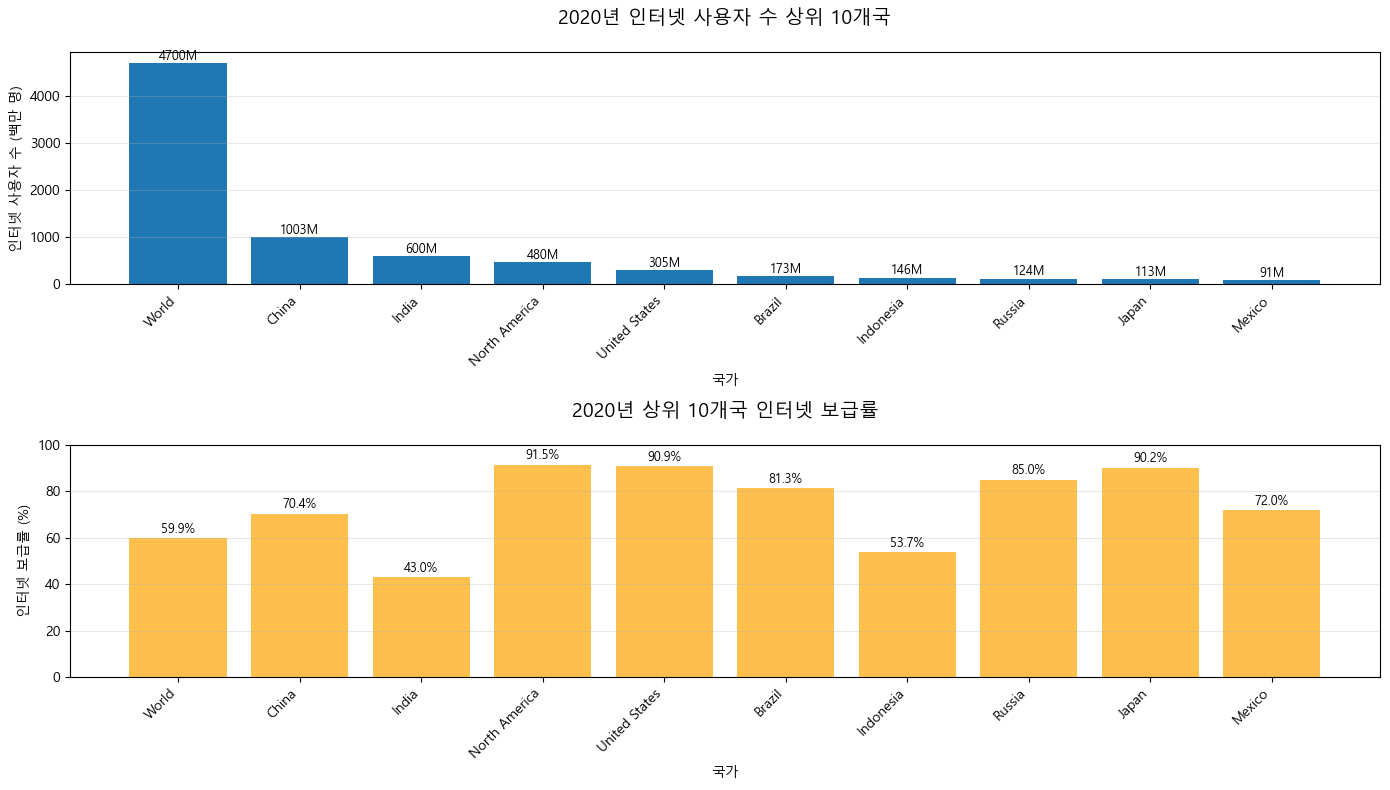

✅ Matplotlib 시각화 완료!
📝 시각화 특징:
  - 상단: 절대적 사용자 수 (중국, 인도 압도적)
  - 하단: 상대적 보급률 (선진국이 높은 보급률)
  - 사용자 수 ≠ 보급률의 차이점 확인


In [133]:
# Matplotlib을 활용한 Global Internet Users 데이터 시각화
try:
    if all(var in globals() for var in ['plt', 'df_internet']):
        print("📊 Matplotlib으로 상위 10개국 인터넷 사용자 수 시각화")
        
        # 최신 연도 데이터로 상위 10개국 선정
        latest_year = df_internet['Year'].max()
        latest_data = df_internet[df_internet['Year'] == latest_year]
        top_10 = latest_data.nlargest(10, 'No. of Internet Users')
        
        # 1. 막대 그래프 - 상위 10개국 인터넷 사용자 수
        plt.figure(figsize=(14, 8))
        plt.subplot(2, 1, 1)
        bars = plt.bar(range(len(top_10)), top_10['No. of Internet Users'] / 1000000)  # 백만 명 단위
        plt.xlabel('국가')
        plt.ylabel('인터넷 사용자 수 (백만 명)')
        plt.title(f'{latest_year}년 인터넷 사용자 수 상위 10개국', fontsize=14, pad=20)
        plt.xticks(range(len(top_10)), top_10['Entity'], rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        # 막대 위에 값 표시
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{height:.0f}M', ha='center', va='bottom', fontsize=9)
        
        # 2. 인터넷 보급률 비교
        plt.subplot(2, 1, 2)
        bars2 = plt.bar(range(len(top_10)), top_10['Internet Users(%)'], color='orange', alpha=0.7)
        plt.xlabel('국가')
        plt.ylabel('인터넷 보급률 (%)')
        plt.title(f'{latest_year}년 상위 10개국 인터넷 보급률', fontsize=14, pad=20)
        plt.xticks(range(len(top_10)), top_10['Entity'], rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        plt.ylim(0, 100)
        
        # 보급률 값 표시
        for i, bar in enumerate(bars2):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Matplotlib 시각화 완료!")
        print("📝 시각화 특징:")
        print("  - 상단: 절대적 사용자 수 (중국, 인도 압도적)")
        print("  - 하단: 상대적 보급률 (선진국이 높은 보급률)")
        print("  - 사용자 수 ≠ 보급률의 차이점 확인")
        
    else:
        missing = []
        if 'plt' not in globals(): missing.append('matplotlib')
        if 'df_internet' not in globals(): missing.append('인터넷 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 라이브러리와 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

📈 Seaborn으로 인터넷 데이터 시계열 및 상관관계 분석
🎯 분석 대상 국가: ['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Nigeria']
📅 분석 기간: 2000년 이후


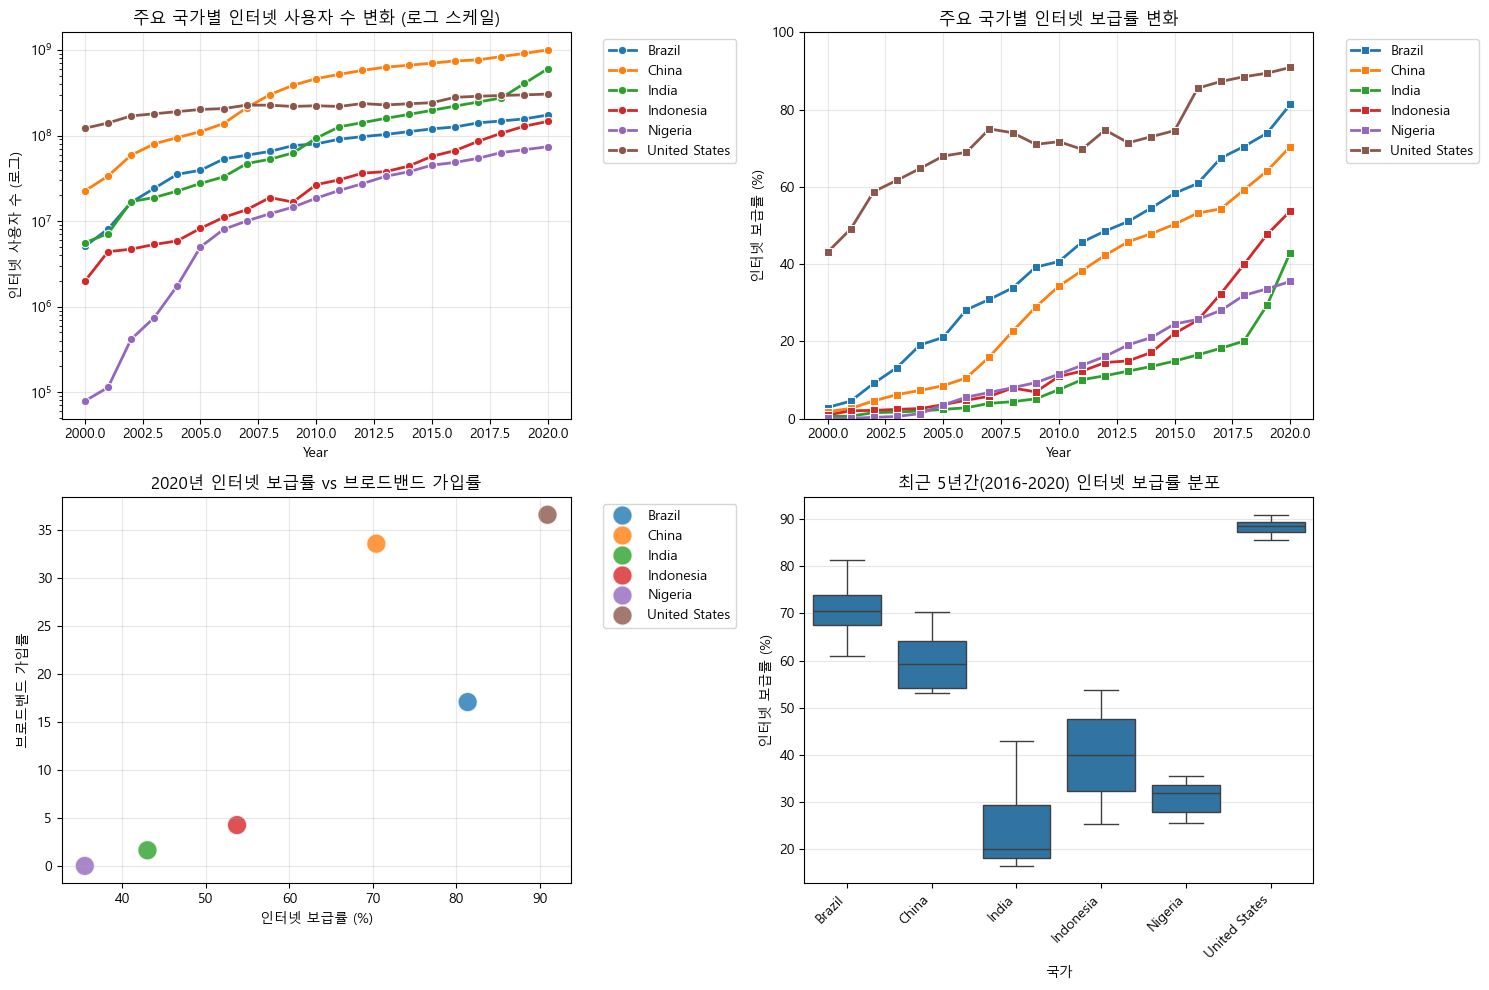

✅ Seaborn 통계적 시각화 완료!
📊 분석 결과:
  - 상단 좌측: 중국, 인도의 급속한 사용자 증가
  - 상단 우측: 선진국의 높은 보급률, 개발도상국의 빠른 성장
  - 하단 좌측: 보급률과 브로드밴드 가입률의 상관관계
  - 하단 우측: 국가별 최근 보급률 변화 범위


In [134]:
# Seaborn을 활용한 Global Internet Users 데이터 통계적 시각화
try:
    if all(var in globals() for var in ['sns', 'plt', 'df_internet']):
        print("📈 Seaborn으로 인터넷 데이터 시계열 및 상관관계 분석")
        
        # 주요 국가들의 시계열 데이터 준비
        major_countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Nigeria']
        available_countries = [country for country in major_countries if country in df_internet['Entity'].unique()]
        
        # 2000년 이후 데이터로 필터링 (더 명확한 트렌드 확인)
        df_recent = df_internet[
            (df_internet['Year'] >= 2000) & 
            (df_internet['Entity'].isin(available_countries))
        ]
        
        print(f"🎯 분석 대상 국가: {available_countries}")
        print(f"📅 분석 기간: 2000년 이후")
        
        # 1. 시계열 라인 플롯 - 국가별 인터넷 사용자 수 변화
        plt.figure(figsize=(15, 10))
        
        # 상단: 사용자 수 변화 (로그 스케일)
        plt.subplot(2, 2, 1)
        sns.lineplot(data=df_recent, x='Year', y='No. of Internet Users', 
                    hue='Entity', marker='o', linewidth=2)
        plt.yscale('log')  # 로그 스케일로 표시 (큰 차이 때문에)
        plt.title('주요 국가별 인터넷 사용자 수 변화 (로그 스케일)', fontsize=12)
        plt.ylabel('인터넷 사용자 수 (로그)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        # 하단: 보급률 변화
        plt.subplot(2, 2, 2)
        sns.lineplot(data=df_recent, x='Year', y='Internet Users(%)', 
                    hue='Entity', marker='s', linewidth=2)
        plt.title('주요 국가별 인터넷 보급률 변화', fontsize=12)
        plt.ylabel('인터넷 보급률 (%)')
        plt.ylim(0, 100)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        # 2. 산점도 - 인터넷 보급률 vs 브로드밴드 가입률
        plt.subplot(2, 2, 3)
        latest_year = df_internet['Year'].max()
        latest_major = df_internet[
            (df_internet['Year'] == latest_year) & 
            (df_internet['Entity'].isin(available_countries))
        ]
        
        sns.scatterplot(data=latest_major, 
                       x='Internet Users(%)', y='Broadband Subscription',
                       hue='Entity', s=200, alpha=0.8)
        plt.title(f'{latest_year}년 인터넷 보급률 vs 브로드밴드 가입률', fontsize=12)
        plt.xlabel('인터넷 보급률 (%)')
        plt.ylabel('브로드밴드 가입률')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        # 4. 박스플롯 - 최근 5년간 보급률 분포
        plt.subplot(2, 2, 4)
        recent_5years = df_internet[
            (df_internet['Year'] >= latest_year - 4) & 
            (df_internet['Entity'].isin(available_countries))
        ]
        
        sns.boxplot(data=recent_5years, x='Entity', y='Internet Users(%)')
        plt.title(f'최근 5년간({latest_year-4}-{latest_year}) 인터넷 보급률 분포', fontsize=12)
        plt.xlabel('국가')
        plt.ylabel('인터넷 보급률 (%)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Seaborn 통계적 시각화 완료!")
        print("📊 분석 결과:")
        print("  - 상단 좌측: 중국, 인도의 급속한 사용자 증가")
        print("  - 상단 우측: 선진국의 높은 보급률, 개발도상국의 빠른 성장")
        print("  - 하단 좌측: 보급률과 브로드밴드 가입률의 상관관계")
        print("  - 하단 우측: 국가별 최근 보급률 변화 범위")
        
    else:
        missing = []
        if 'sns' not in globals(): missing.append('seaborn')
        if 'plt' not in globals(): missing.append('matplotlib')
        if 'df_internet' not in globals(): missing.append('인터넷 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 라이브러리와 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")

In [136]:
# Plotly를 활용한 Global Internet Users 데이터 인터랙티브 시각화
try:
    if all(var in globals() for var in ['px', 'df_internet']):
        print("🚀 Plotly로 Global Internet Users 인터랙티브 시각화")
        
        # 최신 연도 데이터
        latest_year = df_internet['Year'].max()
        latest_data = df_internet[df_internet['Year'] == latest_year].copy()
        
        # 상위 20개국 선정
        top_20 = latest_data.nlargest(20, 'No. of Internet Users')
        
        print(f"📅 기준 연도: {latest_year}")
        print(f"🎯 상위 20개국 선정")
        
        # 1. 인터랙티브 막대 차트 - 상위 20개국 인터넷 사용자 수
        print("\n📊 1. 상위 20개국 인터넷 사용자 수 (막대 차트)")
        
        fig1 = px.bar(
            top_20.sort_values('No. of Internet Users', ascending=True),  # 오름차순 정렬
            x='No. of Internet Users', 
            y='Entity',
            orientation='h',  # 수평 막대
            title=f'{latest_year}년 인터넷 사용자 수 상위 20개국',
            labels={
                'No. of Internet Users': '인터넷 사용자 수',
                'Entity': '국가'
            },
            color='Internet Users(%)',  # 보급률로 색상 구분
            color_continuous_scale='Viridis',
            width=900,
            height=600
        )
        
        fig1.update_layout(
            xaxis_title="인터넷 사용자 수",
            yaxis_title="국가",
            coloraxis_colorbar_title="보급률 (%)"
        )
        
        print("✅ 인터랙티브 막대 차트 생성 완료!")
        
        # 2. 산점도 - 사용자 수 vs 보급률
        print("\n📈 2. 인터넷 사용자 수 vs 보급률 상관관계")
        
        # 로그 스케일로 변환하여 가독성 향상
        latest_data_clean = latest_data[latest_data['No. of Internet Users'] > 0].copy()
        
        fig2 = px.scatter(
            latest_data_clean,
            x='No. of Internet Users',
            y='Internet Users(%)',
            size='Broadband Subscription',  # 브로드밴드 가입률로 크기 결정
            hover_name='Entity',
            hover_data=['Code', 'Cellular Subscription'],
            title=f'{latest_year}년 인터넷 사용자 수 vs 보급률 (버블 차트)',
            labels={
                'No. of Internet Users': '인터넷 사용자 수',
                'Internet Users(%)': '인터넷 보급률 (%)',
                'Broadband Subscription': '브로드밴드 가입률'
            },
            log_x=True,  # X축 로그 스케일
            width=900,
            height=600
        )
        
        fig2.update_layout(
            xaxis_title="인터넷 사용자 수 (로그 스케일)",
            yaxis_title="인터넷 보급률 (%)"
        )
        
        print("✅ 인터랙티브 산점도 생성 완료!")
        
        # 3. 시계열 애니메이션 - 주요 국가들의 변화
        print("\n🎬 3. 주요 국가별 시계열 애니메이션")
        
        # 주요 10개국 선정 (최신 연도 기준)
        top_10_countries = top_20.head(10)['Entity'].tolist()
        
        # 2010년 이후 데이터로 필터링 (애니메이션 효과를 위해)
        animation_data = df_internet[
            (df_internet['Year'] >= 2010) &
            (df_internet['Entity'].isin(top_10_countries)) &
            (df_internet['No. of Internet Users'] > 0)
        ].copy()
        
        fig3 = px.scatter(
            animation_data,
            x='Internet Users(%)',
            y='No. of Internet Users',
            size='Broadband Subscription',
            color='Entity',
            hover_name='Entity',
            animation_frame='Year',  # 연도별 애니메이션
            animation_group='Entity',
            title='주요 10개국 인터넷 발전 과정 (2010-2020)',
            labels={
                'Internet Users(%)': '인터넷 보급률 (%)',
                'No. of Internet Users': '인터넷 사용자 수',
                'Entity': '국가'
            },
            log_y=True,  # Y축 로그 스케일
            range_x=[0, 100],
            width=900,
            height=600
        )
        
        fig3.update_layout(
            xaxis_title="인터넷 보급률 (%)",
            yaxis_title="인터넷 사용자 수 (로그 스케일)"
        )
        
        print("✅ 인터랙티브 애니메이션 차트 생성 완료!")
        
        print("\n🎯 Plotly 시각화 특징:")
        print("  - 막대 차트: 마우스 호버로 상세 정보 확인")
        print("  - 산점도: 버블 크기로 3번째 변수(브로드밴드) 표현")
        print("  - 애니메이션: 재생 버튼으로 시간에 따른 변화 관찰")
        print("  - 모든 차트에서 확대/축소, 범례 클릭 등 인터랙션 가능")
        
        # 실제 표시는 Jupyter 환경에서만 가능
        try:
            fig1.show()
            fig2.show() 
            fig3.show()
        except:
            print("\n💡 참고: Jupyter 환경에서 fig.show()를 실행하면 인터랙티브 차트를 볼 수 있습니다.")
        
    else:
        missing = []
        if 'px' not in globals(): missing.append('plotly')
        if 'df_internet' not in globals(): missing.append('인터넷 데이터')
        
        print(f"❌ 필요한 요소가 없습니다: {', '.join(missing)}")
        print("먼저 Plotly와 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")
    print("💡 해결 방법:")
    print("  1. pip install plotly 실행")
    print("  2. 라이브러리 import 셀 실행")  
    print("  3. 인터넷 데이터 로드 셀 실행")
    print("  4. 이 셀 다시 실행")

🚀 Plotly로 Global Internet Users 인터랙티브 시각화
📅 기준 연도: 2020
🎯 상위 20개국 선정

📊 1. 상위 20개국 인터넷 사용자 수 (막대 차트)
✅ 인터랙티브 막대 차트 생성 완료!

📈 2. 인터넷 사용자 수 vs 보급률 상관관계
✅ 인터랙티브 산점도 생성 완료!

🎬 3. 주요 국가별 시계열 애니메이션
✅ 인터랙티브 애니메이션 차트 생성 완료!

🎯 Plotly 시각화 특징:
  - 막대 차트: 마우스 호버로 상세 정보 확인
  - 산점도: 버블 크기로 3번째 변수(브로드밴드) 표현
  - 애니메이션: 재생 버튼으로 시간에 따른 변화 관찰
  - 모든 차트에서 확대/축소, 범례 클릭 등 인터랙션 가능

💡 참고: Jupyter 환경에서 fig.show()를 실행하면 인터랙티브 차트를 볼 수 있습니다.


In [139]:
# Folium 지도 시각화 - 서울 중심 + Global Internet Users 데이터

try:
    if 'folium' in globals() and 'df_internet' in globals():
        print("🗺️ Folium을 이용한 지도 시각화 (서울 중심)")
        
        # 서울 좌표를 중심으로 지도 생성
        seoul_loc = [37.5662952, 126.9779451]  # 위도, 경도
        m = folium.Map(location=seoul_loc, zoom_start=6, tiles='OpenStreetMap')
        
        print(f"🏙️ 지도 중심: 서울 ({seoul_loc[0]}, {seoul_loc[1]})")
        
        # 서울 마커 추가
        folium.Marker(
            location=seoul_loc,
            popup="<b>서울특별시</b><br>대한민국 수도<br>IT 허브 도시",
            tooltip="서울",
            icon=folium.Icon(color='red', icon='star')
        ).add_to(m)
        
        # 최신 연도 데이터에서 아시아 주요국 선정
        latest_year = df_internet['Year'].max()
        latest_data = df_internet[df_internet['Year'] == latest_year]
        
        # 아시아 주요국과 좌표 정보
        asian_countries_coords = {
            'South Korea': [37.5662952, 126.9779451],  # 서울 (제공받은 좌표)
            'China': [39.9042, 116.4074],              # 베이징
            'Japan': [35.6762, 139.6503],              # 도쿄
            'India': [28.7041, 77.1025],               # 뉴델리
            'Indonesia': [-6.2088, 106.8456],          # 자카르타
            'Thailand': [13.7563, 100.5018],           # 방콕
            'Vietnam': [21.0285, 105.8542],            # 하노이
            'Singapore': [1.3521, 103.8198],           # 싱가포르
            'Malaysia': [3.1390, 101.6869],            # 쿠알라룸푸르
            'Philippines': [14.5995, 120.9842]         # 마닐라
        }
        
        print(f"\n📊 {latest_year}년 아시아 주요국 인터넷 현황:")
        
        # 아시아 국가들의 데이터 필터링 및 지도에 표시
        for country, coords in asian_countries_coords.items():
            country_data = latest_data[latest_data['Entity'] == country]
            
            if not country_data.empty:
                row = country_data.iloc[0]
                users = row['No. of Internet Users']
                percentage = row['Internet Users(%)']
                broadband = row['Broadband Subscription']
                
                print(f"  🌏 {country}: {users:,}명 ({percentage:.1f}%)")
                
                # 인터넷 사용자 수에 따른 마커 크기 결정
                if users > 500000000:      # 5억 이상
                    radius = 25
                    color = 'darkred'
                elif users > 100000000:    # 1억 이상
                    radius = 20
                    color = 'red'
                elif users > 50000000:     # 5천만 이상
                    radius = 15
                    color = 'orange'
                else:                      # 5천만 미만
                    radius = 10
                    color = 'green'
                
                # 원형 마커로 사용자 규모 표시
                folium.CircleMarker(
                    location=coords,
                    radius=radius,
                    popup=f"""
                    <div style="width:200px">
                        <h4><b>{country}</b></h4>
                        <hr>
                        📱 <b>인터넷 사용자 수:</b><br>
                        &nbsp;&nbsp;&nbsp;&nbsp;{users:,}명<br><br>
                        📊 <b>인터넷 보급률:</b><br>
                        &nbsp;&nbsp;&nbsp;&nbsp;{percentage:.1f}%<br><br>
                        🌐 <b>브로드밴드 가입률:</b><br>
                        &nbsp;&nbsp;&nbsp;&nbsp;{broadband:.1f}%<br>
                        <hr>
                        <small>데이터 기준: {latest_year}년</small>
                    </div>
                    """,
                    tooltip=f"{country}: {users:,}명",
                    color='white',
                    weight=2,
                    fillColor=color,
                    fillOpacity=0.7
                ).add_to(m)
        
        # 서울과 주요 도시 간 연결선 표시 (옵션)
        major_cities = ['China', 'Japan', 'Singapore']
        for city in major_cities:
            if city in asian_countries_coords:
                folium.PolyLine(
                    locations=[seoul_loc, asian_countries_coords[city]],
                    color='blue',
                    weight=2,
                    opacity=0.5,
                    popup=f"서울 ↔ {city}"
                ).add_to(m)
        
        # 범례 추가 (HTML)
        legend_html = '''
        <div style="position: fixed; 
                    top: 10px; right: 10px; width: 180px; height: 140px; 
                    background-color: white; border:2px solid grey; z-index:9999; 
                    font-size:12px; padding: 10px">
        <h5><b>인터넷 사용자 규모</b></h5>
        <i class="fa fa-circle" style="color:darkred"></i> 5억명 이상<br>
        <i class="fa fa-circle" style="color:red"></i> 1억-5억명<br>
        <i class="fa fa-circle" style="color:orange"></i> 5천만-1억명<br>
        <i class="fa fa-circle" style="color:green"></i> 5천만명 미만<br>
        <hr>
        <i class="fa fa-star" style="color:red"></i> 서울 (중심점)
        </div>
        '''
        m.get_root().html.add_child(folium.Element(legend_html))
        
        print("\n✅ 서울 중심 아시아 인터넷 현황 지도 완성!")
        print("🎯 지도 특징:")
        print("  - 중심: 서울특별시")
        print("  - 마커 크기: 인터넷 사용자 수 비례")
        print("  - 색상: 사용자 규모별 구분")
        print("  - 팝업: 상세 통계 정보")
        print("  - 연결선: 서울-주요도시 간 관계")
        
        # 지도 반환 (Jupyter에서 표시하려면 주석 해제)
        # m
        
    elif 'folium' not in globals():
        print("❌ Folium이 로드되지 않았습니다.")
        print("pip install folium을 실행하고 라이브러리를 import하세요.")
        
    elif 'df_internet' not in globals():
        print("❌ df_internet 데이터가 없습니다.")
        print("먼저 Global Internet Users 데이터를 로드하세요.")
        
except Exception as e:
    print(f"오류 발생: {e}")
    print("💡 해결 방법:")
    print("  1. pip install folium 실행")
    print("  2. 라이브러리 import 셀 실행")
    print("  3. 인터넷 데이터 로드 셀 실행")
    print("  4. 이 셀 다시 실행")

🗺️ Folium을 이용한 지도 시각화 (서울 중심)
🏙️ 지도 중심: 서울 (37.5662952, 126.9779451)

📊 2020년 아시아 주요국 인터넷 현황:
  🌏 South Korea: 50,032,746명 (96.5%)
  🌏 China: 1,003,218,650명 (70.4%)
  🌏 Japan: 112,995,146명 (90.2%)
  🌏 India: 600,446,441명 (43.0%)
  🌏 Indonesia: 146,059,763명 (53.7%)
  🌏 Thailand: 55,639,332명 (77.8%)
  🌏 Vietnam: 67,944,025명 (70.3%)
  🌏 Singapore: 5,437,341명 (92.0%)
  🌏 Malaysia: 29,732,254명 (89.6%)
  🌏 Philippines: 55,871,109명 (49.8%)

✅ 서울 중심 아시아 인터넷 현황 지도 완성!
🎯 지도 특징:
  - 중심: 서울특별시
  - 마커 크기: 인터넷 사용자 수 비례
  - 색상: 사용자 규모별 구분
  - 팝업: 상세 통계 정보
  - 연결선: 서울-주요도시 간 관계


In [140]:
# 139번 셀: Folium 서울 중심 지도 시각화

import folium

# 서울 좌표 설정
loc = [37.5662952, 126.9779451]  # 위도, 경도

# 서울 중심 지도 생성
m = folium.Map(location=loc, zoom_start=12)

# 서울 마커 추가  
folium.Marker(
    location=loc,
    popup="<b>서울특별시</b><br>대한민국 수도<br>IT 허브 도시",
    tooltip="서울",
    icon=folium.Icon(color='red', icon='star')
).add_to(m)

# Global Internet Users 데이터가 있다면 추가 정보 표시
try:
    if 'df_internet' in globals():
        # 한국 데이터 찾기
        korea_data = df_internet[
            (df_internet['Entity'] == 'South Korea') & 
            (df_internet['Year'] == df_internet['Year'].max())
        ]
        
        if not korea_data.empty:
            korea_row = korea_data.iloc[0]
            users = korea_row['No. of Internet Users']
            percentage = korea_row['Internet Users(%)']
            
            # 추가 정보를 가진 큰 원형 마커
            folium.CircleMarker(
                location=loc,
                radius=20,
                popup=f"""
                <div style="width:250px">
                    <h3><b>🇰🇷 대한민국 인터넷 현황</b></h3>
                    <hr>
                    📱 <b>인터넷 사용자 수:</b><br>
                    &nbsp;&nbsp;&nbsp;&nbsp;{users:,}명<br><br>
                    📊 <b>인터넷 보급률:</b><br>
                    &nbsp;&nbsp;&nbsp;&nbsp;{percentage:.1f}%<br><br>
                    🏙️ <b>중심 도시:</b> 서울<br>
                    📍 <b>좌표:</b> {loc[0]}, {loc[1]}
                    <hr>
                    <small>데이터 기준: {korea_row['Year']}년</small>
                </div>
                """,
                color='blue',
                weight=3,
                fillColor='lightblue',
                fillOpacity=0.5
            ).add_to(m)
            
            print(f"✅ 한국 인터넷 현황 추가됨: {users:,}명 ({percentage:.1f}%)")
        else:
            print("❌ 한국 데이터를 찾을 수 없습니다.")
    else:
        print("💡 df_internet 데이터가 없어서 기본 지도만 표시됩니다.")
        print("더 많은 정보를 보려면 cell-16에서 데이터를 먼저 로드하세요.")
        
except Exception as e:
    print(f"데이터 처리 중 오류: {e}")

print("🗺️ 서울 중심 지도 생성 완료!")
print(f"📍 중심 좌표: {loc[0]}, {loc[1]}")
print("🎯 지도를 보려면 아래 결과를 확인하세요.")

# 지도 표시
m

✅ 한국 인터넷 현황 추가됨: 50,032,746명 (96.5%)
🗺️ 서울 중심 지도 생성 완료!
📍 중심 좌표: 37.5662952, 126.9779451
🎯 지도를 보려면 아래 결과를 확인하세요.


In [144]:
# 141번 셀: 스타벅스 매장 정보 API 호출

import requests

# 스타벅스 매장 정보 API 호출
targetSite = 'https://www.starbucks.co.kr/store/getStore.do?r=8K3XF06R9Q'

req = requests.post(targetSite, data={
    'ins_lat': 37.563398,        # 위도 (서울 중심부)
    'ins_lng': 126.9863309,      # 경도 (서울 중심부)
    'p_sido_cd': '01',           # 시도코드 (서울)
    'p_gugun_cd': '',            # 구군코드 (전체)
    'in_biz_cd': '',             # 업종코드 (전체)
    'iend': 600,                 # 조회 개수
    'set_date': ''               # 날짜 설정
})

# JSON 응답 데이터 받기
starbucks = req.json()

# 데이터 타입 확인
print(type(starbucks))

# 추가 정보 출력
print(f"📍 검색 중심 좌표: (37.563398, 126.9863309)")
print(f"🏪 응답 데이터 타입: {type(starbucks)}")

# 데이터 구조 간단히 확인
if isinstance(starbucks, dict):
    print(f"📋 응답 키 목록: {list(starbucks.keys())}")
    
    # list 키가 있다면 매장 개수 확인
    if 'list' in starbucks:
        stores = starbucks['list']
        print(f"🏪 검색된 스타벅스 매장 수: {len(stores)}개")
        
        # 첫 번째 매장 정보 미리보기
        if len(stores) > 0:
            first_store = stores[0]
            if isinstance(first_store, dict):
                print(f"🔍 첫 번째 매장 정보 키: {list(first_store.keys())}")
                
                # 매장명이 있다면 출력
                if 's_name' in first_store:
                    print(f"🏪 첫 번째 매장명: {first_store['s_name']}")
                    
elif isinstance(starbucks, list):
    print(f"📦 리스트 형태 데이터, 항목 수: {len(starbucks)}")
else:
    print(f"⚠️ 예상과 다른 데이터 형태: {starbucks}")

print("✅ 스타벅스 API 호출 완료!")

<class 'dict'>
📍 검색 중심 좌표: (37.563398, 126.9863309)
🏪 응답 데이터 타입: <class 'dict'>
📋 응답 키 목록: ['list']
🏪 검색된 스타벅스 매장 수: 600개
🔍 첫 번째 매장 정보 키: ['seq', 'sido_cd', 'sido_nm', 'gugun_cd', 'gugun_nm', 'code_order', 'view_yn', 'store_num', 'sido', 'gugun', 'address', 'new_img_nm', 'p_pro_seq', 'p_view_yn', 'p_sido_cd', 'p_gugun_cd', 'p_store_nm', 'p_theme_cd', 'p_wireless_yn', 'p_smoking_yn', 'p_book_yn', 'p_music_yn', 'p_terrace_yn', 'p_table_yn', 'p_takeout_yn', 'p_parking_yn', 'p_dollar_assent', 'p_card_recharge', 'p_subway_yn', 'stb_store_file_renew', 'stb_store_theme_renew', 'stb_store_time_renew', 'stb_store_lsm', 's_code', 's_name', 'tel', 'dlvry_call_cntr_phno', 'fax', 'sido_code', 'sido_name', 'gugun_code', 'gugun_name', 'addr', 'park_info', 'new_state', 'theme_state', 'new_bool', 'search_text', 'ins_lat', 'ins_lng', 'in_distance', 'out_distance', 'all_search_cnt', 'addr_search_cnt', 'store_search_cnt', 'rowCount', 'store_nm', 'store_cd', 's_biz_code', 'new_icon', 'set_user', 'favorites

In [145]:
# 142번 셀: 스타벅스 매장 위치 지도 시각화

import folium
from folium.plugins import MarkerCluster

try:
    # starbucks 데이터가 있는지 확인
    if 'starbucks' in globals():
        print("☕ 스타벅스 매장 지도 시각화 시작!")
        
        # 서울 중심 좌표
        seoul_center = [37.563398, 126.9863309]
        
        # 지도 생성 (줌 레벨을 조금 낮춰서 서울 전체가 보이도록)
        starbucks_map = folium.Map(
            location=seoul_center, 
            zoom_start=11,
            tiles='OpenStreetMap'
        )
        
        # 마커 클러스터 생성 (매장이 많을 때 깔끔하게 표시)
        marker_cluster = MarkerCluster().add_to(starbucks_map)
        
        # 스타벅스 데이터 처리
        if isinstance(starbucks, dict) and 'list' in starbucks:
            stores = starbucks['list']
            print(f"🏪 지도에 표시할 매장 수: {len(stores)}개")
            
            # 각 매장을 지도에 마커로 추가
            for i, store in enumerate(stores):
                try:
                    # 위도, 경도 정보 추출
                    lat = float(store.get('lat', 0))
                    lng = float(store.get('lng', 0))
                    
                    # 위도, 경도가 유효한 경우에만 마커 추가
                    if lat != 0 and lng != 0:
                        store_name = store.get('s_name', '매장명 없음')
                        address = store.get('new_addr', store.get('addr', '주소 없음'))
                        phone = store.get('tel', '전화번호 없음')
                        
                        # 매장 타입에 따른 아이콘 색상 설정
                        if '리저브' in store_name:
                            icon_color = 'purple'  # 리저브 매장
                        elif 'DT' in store_name or '드라이브' in store_name:
                            icon_color = 'green'   # 드라이브스루
                        else:
                            icon_color = 'red'     # 일반 매장
                        
                        # 팝업 내용 생성
                        popup_html = f"""
                        <div style="width:280px">
                            <h4><b>☕ {store_name}</b></h4>
                            <hr>
                            📍 <b>주소:</b><br>
                            &nbsp;&nbsp;&nbsp;&nbsp;{address}<br><br>
                            📞 <b>전화번호:</b><br>
                            &nbsp;&nbsp;&nbsp;&nbsp;{phone}<br><br>
                            🗺️ <b>좌표:</b><br>
                            &nbsp;&nbsp;&nbsp;&nbsp;위도: {lat}<br>
                            &nbsp;&nbsp;&nbsp;&nbsp;경도: {lng}<br>
                            <hr>
                            <small>매장 번호: {i+1}</small>
                        </div>
                        """
                        
                        # 마커 생성 및 클러스터에 추가
                        folium.Marker(
                            location=[lat, lng],
                            popup=folium.Popup(popup_html, max_width=300),
                            tooltip=f"{store_name}",
                            icon=folium.Icon(
                                color=icon_color, 
                                icon='coffee',
                                prefix='fa'
                            )
                        ).add_to(marker_cluster)
                        
                except (ValueError, KeyError) as e:
                    print(f"⚠️ 매장 {i+1} 데이터 처리 오류: {e}")
                    continue
            
            # 검색 중심점 표시
            folium.CircleMarker(
                location=seoul_center,
                radius=15,
                popup="<b>🎯 검색 중심점</b><br>서울 중심부",
                tooltip="검색 중심점",
                color='blue',
                weight=3,
                fillColor='lightblue',
                fillOpacity=0.7
            ).add_to(starbucks_map)
            
            # 범례 추가
            legend_html = '''
            <div style="position: fixed; 
                        top: 10px; right: 10px; width: 200px; height: 160px; 
                        background-color: white; border:2px solid grey; z-index:9999; 
                        font-size:12px; padding: 10px">
            <h5><b>☕ 스타벅스 매장 분류</b></h5>
            <i class="fa fa-coffee" style="color:red"></i> 일반 매장<br>
            <i class="fa fa-coffee" style="color:green"></i> 드라이브스루<br>
            <i class="fa fa-coffee" style="color:purple"></i> 리저브 매장<br>
            <hr>
            <i class="fa fa-circle" style="color:blue"></i> 검색 중심점<br>
            <small>클러스터 마커를 클릭하면 확대됩니다</small>
            </div>
            '''
            starbucks_map.get_root().html.add_child(folium.Element(legend_html))
            
            print("✅ 스타벅스 매장 지도 시각화 완료!")
            print("🎯 지도 특징:")
            print(f"  - 총 {len(stores)}개 매장 위치 표시")
            print("  - 클러스터링으로 깔끔한 표시")
            print("  - 매장 타입별 색상 구분")
            print("  - 상세 정보 팝업")
            print("  - 검색 중심점 표시")
            
        else:
            print("❌ starbucks 데이터 형식이 예상과 다릅니다.")
            print("기본 서울 지도만 표시합니다.")
            
            # 기본 지도 생성
            starbucks_map = folium.Map(location=seoul_center, zoom_start=11)
            folium.Marker(
                location=seoul_center,
                popup="검색 중심점",
                icon=folium.Icon(color='blue', icon='star')
            ).add_to(starbucks_map)
        
        # 지도 표시
        starbucks_map
        
    else:
        print("❌ starbucks 데이터가 없습니다.")
        print("먼저 141번 셀에서 스타벅스 API를 호출하세요.")
        
        # 안내용 기본 지도
        seoul_center = [37.563398, 126.9863309]
        info_map = folium.Map(location=seoul_center, zoom_start=11)
        folium.Marker(
            location=seoul_center,
            popup="<b>스타벅스 데이터를 먼저 로드하세요</b><br>141번 셀 실행 필요",
            icon=folium.Icon(color='red', icon='exclamation-sign')
        ).add_to(info_map)
        
        info_map
        
except Exception as e:
    print(f"오류 발생: {e}")
    print("💡 해결 방법:")
    print("  1. 141번 셀 먼저 실행 (스타벅스 데이터 로드)")
    print("  2. 이 셀 다시 실행")

☕ 스타벅스 매장 지도 시각화 시작!
🏪 지도에 표시할 매장 수: 600개
✅ 스타벅스 매장 지도 시각화 완료!
🎯 지도 특징:
  - 총 600개 매장 위치 표시
  - 클러스터링으로 깔끔한 표시
  - 매장 타입별 색상 구분
  - 상세 정보 팝업
  - 검색 중심점 표시


In [151]:
# C:\githome\15week_cloud-data-viz\250818_cloud_data_viz.ipynb
# 142번 셀: 스타벅스 매장 위치 지도 시각화 (수정 완료!)

import folium
try:
    from folium.plugins import MarkerCluster
    cluster_available = True
except ImportError:
    cluster_available = False
    print("⚠️ MarkerCluster를 사용할 수 없습니다. 기본 마커를 사용합니다.")

try:
    # starbucks 데이터가 있는지 확인
    if 'starbucks' in globals():
        print("☕ 스타벅스 매장 지도 시각화 시작!")
        
        # 서울 중심 좌표
        seoul_center = [37.563398, 126.9863309]
        
        # 지도 생성
        starbucks_map = folium.Map(
            location=seoul_center, 
            zoom_start=11,
            tiles='OpenStreetMap'
        )
        
        # 마커 클러스터 생성 (가능한 경우)
        if cluster_available:
            marker_cluster = MarkerCluster().add_to(starbucks_map)
            target_map = marker_cluster
        else:
            target_map = starbucks_map
        
        # 스타벅스 데이터 처리
        if isinstance(starbucks, dict) and 'list' in starbucks:
            stores = starbucks['list']
            print(f"🏪 지도에 표시할 매장 수: {len(stores)}개")
            
            valid_stores = 0  # 유효한 매장 수 카운트
            
            # 각 매장을 지도에 마커로 추가
            for i, store in enumerate(stores):
                try:
                    # ✅ 올바른 키 사용: lat (위도), lot (경도)
                    lat = float(store.get('lat', 0))
                    lng = float(store.get('lot', 0))  # lng가 아니라 lot!
                    
                    # 위도, 경도가 유효한 경우에만 마커 추가
                    if lat != 0 and lng != 0:
                        store_name = store.get('s_name', '매장명 없음')
                        address = store.get('doro_address', '주소 없음')
                        sido_name = store.get('sido_name', '')
                        gugun_name = store.get('gugun_name', '')
                        
                        # 매장 타입에 따른 아이콘 색상 설정
                        if '리저브' in store_name:
                            icon_color = 'purple'  # 리저브 매장
                        elif 'DT' in store_name or '드라이브' in store_name:
                            icon_color = 'green'   # 드라이브스루
                        else:
                            icon_color = 'red'     # 일반 매장
                        
                        # 팝업 내용 생성
                        popup_html = f"""
                        <div style="width:250px">
                            <h4><b>☕ {store_name}</b></h4>
                            <hr>
                            📍 <b>주소:</b><br>
                            &nbsp;&nbsp;&nbsp;&nbsp;{address}<br><br>
                            🗺️ <b>지역:</b><br>
                            &nbsp;&nbsp;&nbsp;&nbsp;{sido_name} {gugun_name}<br><br>
                            📐 <b>좌표:</b><br>
                            &nbsp;&nbsp;&nbsp;&nbsp;위도: {lat}<br>
                            &nbsp;&nbsp;&nbsp;&nbsp;경도: {lng}
                        </div>
                        """
                        
                        # 마커 생성
                        folium.Marker(
                            location=[lat, lng],
                            popup=folium.Popup(popup_html, max_width=300),
                            tooltip=store_name,
                            icon=folium.Icon(color=icon_color, icon='star')
                        ).add_to(target_map)
                        
                        valid_stores += 1
                        
                except (ValueError, KeyError, TypeError) as e:
                    continue
            
            # 검색 중심점 표시
            folium.CircleMarker(
                location=seoul_center,
                radius=15,
                popup="<b>🎯 검색 중심점</b><br>서울 중심부",
                tooltip="검색 중심점",
                color='blue',
                weight=3,
                fillColor='lightblue',
                fillOpacity=0.7
            ).add_to(starbucks_map)
            
            # 범례 추가
            legend_html = '''
            <div style="position: fixed; 
                        top: 10px; right: 10px; width: 200px; height: 160px; 
                        background-color: white; border:2px solid grey; z-index:9999; 
                        font-size:12px; padding: 10px">
            <h5><b>☕ 스타벅스 매장 분류</b></h5>
            <i class="fa fa-star" style="color:red"></i> 일반 매장<br>
            <i class="fa fa-star" style="color:green"></i> 드라이브스루<br>
            <i class="fa fa-star" style="color:purple"></i> 리저브 매장<br>
            <hr>
            <i class="fa fa-circle" style="color:blue"></i> 검색 중심점<br>
            <small>총 {valid_stores}개 매장 표시</small>
            </div>
            '''.format(valid_stores='{valid_stores}')
            
            starbucks_map.get_root().html.add_child(folium.Element(legend_html))
            
            print(f"✅ {valid_stores}개 매장이 지도에 표시되었습니다!")
            print("🎯 지도 특징:")
            print("  - 빨간별: 일반 매장")
            print("  - 초록별: 드라이브스루")  
            print("  - 보라별: 리저브 매장")
            print("  - 파란원: 검색 중심점")
            
        else:
            print("❌ starbucks 데이터 형식이 예상과 다릅니다.")
        
        print("🗺️ 지도를 표시합니다...")
        
        # 지도 표시
        from IPython.display import display
        display(starbucks_map)
        
    else:
        print("❌ starbucks 데이터가 없습니다.")
        
except Exception as e:
    print(f"오류 발생: {e}")
    
    # 비상용 기본 지도
    simple_map = folium.Map(location=[37.563398, 126.9863309], zoom_start=11)
    folium.Marker(
        location=[37.563398, 126.9863309],
        popup="스타벅스 검색 중심점",
        icon=folium.Icon(color='red', icon='star')
    ).add_to(simple_map)
    
    from IPython.display import display
    display(simple_map)

☕ 스타벅스 매장 지도 시각화 시작!
🏪 지도에 표시할 매장 수: 600개
✅ 600개 매장이 지도에 표시되었습니다!
🎯 지도 특징:
  - 빨간별: 일반 매장
  - 초록별: 드라이브스루
  - 보라별: 리저브 매장
  - 파란원: 검색 중심점
🗺️ 지도를 표시합니다...


In [150]:
# C:\githome\15week_cloud-data-viz\250818_cloud_data_viz.ipynb
# 143번 셀: 스타벅스 데이터 구조 확인 및 디버깅

print("🔍 스타벅스 데이터 구조 분석")
print("="*50)

if 'starbucks' in globals():
    if isinstance(starbucks, dict) and 'list' in starbucks:
        stores = starbucks['list']
        print(f"📋 총 매장 수: {len(stores)}")
        
        if len(stores) > 0:
            # 첫 번째 매장 데이터 상세 분석
            first_store = stores[0]
            print(f"\n🏪 첫 번째 매장 데이터:")
            print(f"데이터 타입: {type(first_store)}")
            
            if isinstance(first_store, dict):
                print(f"키 목록: {list(first_store.keys())}")
                
                # 주요 정보 출력
                for key, value in first_store.items():
                    print(f"  {key}: {value} ({type(value)})")
                
                print(f"\n📍 좌표 정보 확인:")
                lat_keys = ['lat', 'latitude', 'LAT', 'y', 'Y']
                lng_keys = ['lng', 'lon', 'longitude', 'LNG', 'LON', 'x', 'X']
                
                lat_found = None
                lng_found = None
                
                for key in lat_keys:
                    if key in first_store:
                        lat_found = key
                        print(f"  위도 키 발견: '{key}' = {first_store[key]}")
                        break
                
                for key in lng_keys:
                    if key in first_store:
                        lng_found = key
                        print(f"  경도 키 발견: '{key}' = {first_store[key]}")
                        break
                
                if not lat_found:
                    print("  ❌ 위도 정보를 찾을 수 없습니다!")
                if not lng_found:
                    print("  ❌ 경도 정보를 찾을 수 없습니다!")
                
                # 매장 이름 확인
                name_keys = ['s_name', 'name', 'store_name', 'storeName']
                for key in name_keys:
                    if key in first_store:
                        print(f"  매장명: {first_store[key]}")
                        break
                        
        # 처음 3개 매장 샘플 확인
        print(f"\n📊 처음 3개 매장 샘플:")
        for i in range(min(3, len(stores))):
            store = stores[i]
            if isinstance(store, dict):
                name = store.get('s_name', '이름없음')
                lat = store.get('lat', 'N/A')
                lng = store.get('lng', 'N/A')
                print(f"  {i+1}. {name} - 위도:{lat}, 경도:{lng}")
                
    else:
        print("❌ 예상과 다른 데이터 구조입니다.")
        print(f"starbucks 타입: {type(starbucks)}")
        if isinstance(starbucks, dict):
            print(f"키 목록: {list(starbucks.keys())}")
else:
    print("❌ starbucks 변수가 없습니다.")

🔍 스타벅스 데이터 구조 분석
📋 총 매장 수: 600

🏪 첫 번째 매장 데이터:
데이터 타입: <class 'dict'>
키 목록: ['seq', 'sido_cd', 'sido_nm', 'gugun_cd', 'gugun_nm', 'code_order', 'view_yn', 'store_num', 'sido', 'gugun', 'address', 'new_img_nm', 'p_pro_seq', 'p_view_yn', 'p_sido_cd', 'p_gugun_cd', 'p_store_nm', 'p_theme_cd', 'p_wireless_yn', 'p_smoking_yn', 'p_book_yn', 'p_music_yn', 'p_terrace_yn', 'p_table_yn', 'p_takeout_yn', 'p_parking_yn', 'p_dollar_assent', 'p_card_recharge', 'p_subway_yn', 'stb_store_file_renew', 'stb_store_theme_renew', 'stb_store_time_renew', 'stb_store_lsm', 's_code', 's_name', 'tel', 'dlvry_call_cntr_phno', 'fax', 'sido_code', 'sido_name', 'gugun_code', 'gugun_name', 'addr', 'park_info', 'new_state', 'theme_state', 'new_bool', 'search_text', 'ins_lat', 'ins_lng', 'in_distance', 'out_distance', 'all_search_cnt', 'addr_search_cnt', 'store_search_cnt', 'rowCount', 'store_nm', 'store_cd', 's_biz_code', 'new_icon', 'set_user', 'favorites', 'map_desc', 'notice', 'defaultimage', 'etcimage', 'in_biz_c